In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
AAPL=pd.read_csv("Database/AAPL.csv")
TSLA=pd.read_csv("Database/TSLA.csv")
GOOG=pd.read_csv("Database/GOOG.csv")
MSFT=pd.read_csv("Database/MSFT.csv")
AMZN=pd.read_csv("Database/AMZN.csv")

In [3]:
AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,122.59,124.85,121.20,121.26,121.26,"16,43,20,000"
1,25-Feb-2021,124.68,126.46,120.54,120.99,120.99,"14,73,06,500"
2,24-Feb-2021,124.94,125.56,122.23,125.35,125.35,"11,06,91,500"
3,23-Feb-2021,123.76,126.71,118.39,125.86,125.86,"15,78,59,100"
4,22-Feb-2021,128.01,129.72,125.60,126.00,126.00,"10,36,07,600"


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9800 non-null   object 
 1   Open        9800 non-null   object 
 2   High        9725 non-null   float64
 3   Low         9725 non-null   float64
 4   Close       9725 non-null   float64
 5   Adj. Close  9725 non-null   float64
 6   Volume      9725 non-null   object 
dtypes: float64(4), object(3)
memory usage: 536.1+ KB


In [5]:
AAPL.dropna(inplace=True)

In [6]:
#change Dtype of column
AAPL["Date"]=pd.to_datetime(AAPL["Date"])
AAPL["Volume"]=AAPL["Volume"].str.replace(',','')
AAPL=AAPL.astype({"Open":float,"Volume":float})

In [7]:
#sort the dataset by date
AAPL=AAPL.sort_values(by='Date',ignore_index=True)

In [8]:
AAPL

,Date,Open,High,Low,Close,Adj. Close,Volume
0,1982-08-03,0.06,0.06,0.06,0.06,0.05,89868800.0
1,1982-08-04,0.06,0.06,0.06,0.06,0.05,83865600.0
2,1982-08-05,0.06,0.06,0.06,0.06,0.04,69753600.0
3,1982-08-06,0.06,0.06,0.05,0.05,0.04,96835200.0
4,1982-08-09,0.06,0.06,0.06,0.06,0.04,56112000.0
...,...,...,...,...,...,...,...
9720,2021-02-22,128.01,129.72,125.60,126.00,126.00,103607600.0
9721,2021-02-23,123.76,126.71,118.39,125.86,125.86,157859100.0
9722,2021-02-24,124.94,125.56,122.23,125.35,125.35,110691500.0
9723,2021-02-25,124.68,126.46,120.54,120.99,120.99,147306500.0


In [9]:
#Drop rows having Date < '2015-01-01'
AAPL=AAPL[AAPL['Date']>='2015-01-01'].reset_index(drop=True)

In [10]:
AAPL.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,50.160265,50.700723,49.618696,50.182447,48.781143,1.449887e+08
std,28.029971,28.433917,27.552589,28.007536,28.560715,7.095025e+07
min,22.500000,22.920000,22.370000,22.580000,21.130000,4.544800e+07
25%,30.000000,30.130000,29.810000,29.990000,27.910000,9.667000e+07
50%,42.020000,42.550000,41.630000,42.100000,40.600000,1.272076e+08
75%,55.100000,55.710000,54.370000,55.170000,53.980000,1.731832e+08
max,143.600000,145.090000,141.370000,143.160000,142.950000,6.488252e+08


In [11]:
TSLA.dropna(inplace=True)
GOOG.dropna(inplace=True)
AMZN.dropna(inplace=True)
MSFT.dropna(inplace=True)

### change Dtype of column

In [12]:
TSLA["Date"]=pd.to_datetime(TSLA["Date"])
TSLA["Volume"]=TSLA["Volume"].str.replace(',','')
TSLA=TSLA.astype({"Open":float,"Volume":float})

In [13]:
GOOG["Date"]=pd.to_datetime(GOOG["Date"])
for col in ["Open","High","Low","Close","Adj. Close","Volume"]:
    GOOG[col]=GOOG[col].str.replace(',','')
    
GOOG=GOOG.astype({"Open":float,"High":float,
                  "Low":float,'Close':float,
                  'Adj. Close':float,"Volume":float})


In [14]:
MSFT["Date"]=pd.to_datetime(MSFT["Date"])
MSFT['Open']=MSFT['Open'].str.replace(',','')
MSFT["Volume"]=MSFT["Volume"].str.replace(',','')
MSFT=MSFT.astype({"Open":float,"Volume":float})

In [15]:
AMZN["Date"]=pd.to_datetime(MSFT["Date"])

for col in ['Open','High','Low','Close','Adj. Close','Volume']:
    AMZN[col]=AMZN[col].str.replace(',','')

AMZN=AMZN.astype({"Open":float,"High":float,
                  "Low":float,"Close":float,
                  "Adj. Close":float,"Volume":float})

### sort the dataset by date

In [16]:
AMZN=AMZN.sort_values(by='Date',ignore_index=True)
MSFT=MSFT.sort_values(by='Date',ignore_index=True)
GOOG=GOOG.sort_values(by='Date',ignore_index=True)
TSLA=TSLA.sort_values(by='Date',ignore_index=True)

### Drop rows having Date < '2015-01-01'

In [17]:
TSLA=TSLA[TSLA['Date']>='2015-01-01'].reset_index(drop=True)
GOOG=GOOG[GOOG['Date']>='2015-01-01'].reset_index(drop=True)
MSFT=MSFT[MSFT['Date']>='2015-01-01'].reset_index(drop=True)
AMZN=AMZN[AMZN['Date']>='2015-01-01'].reset_index(drop=True)

# Exploratory Data Analysis

In [18]:
Companies=[AAPL,TSLA,GOOG,MSFT,AMZN]
Companies_Title=['Apple','Tesla','Google','Microsoft','Amazon']

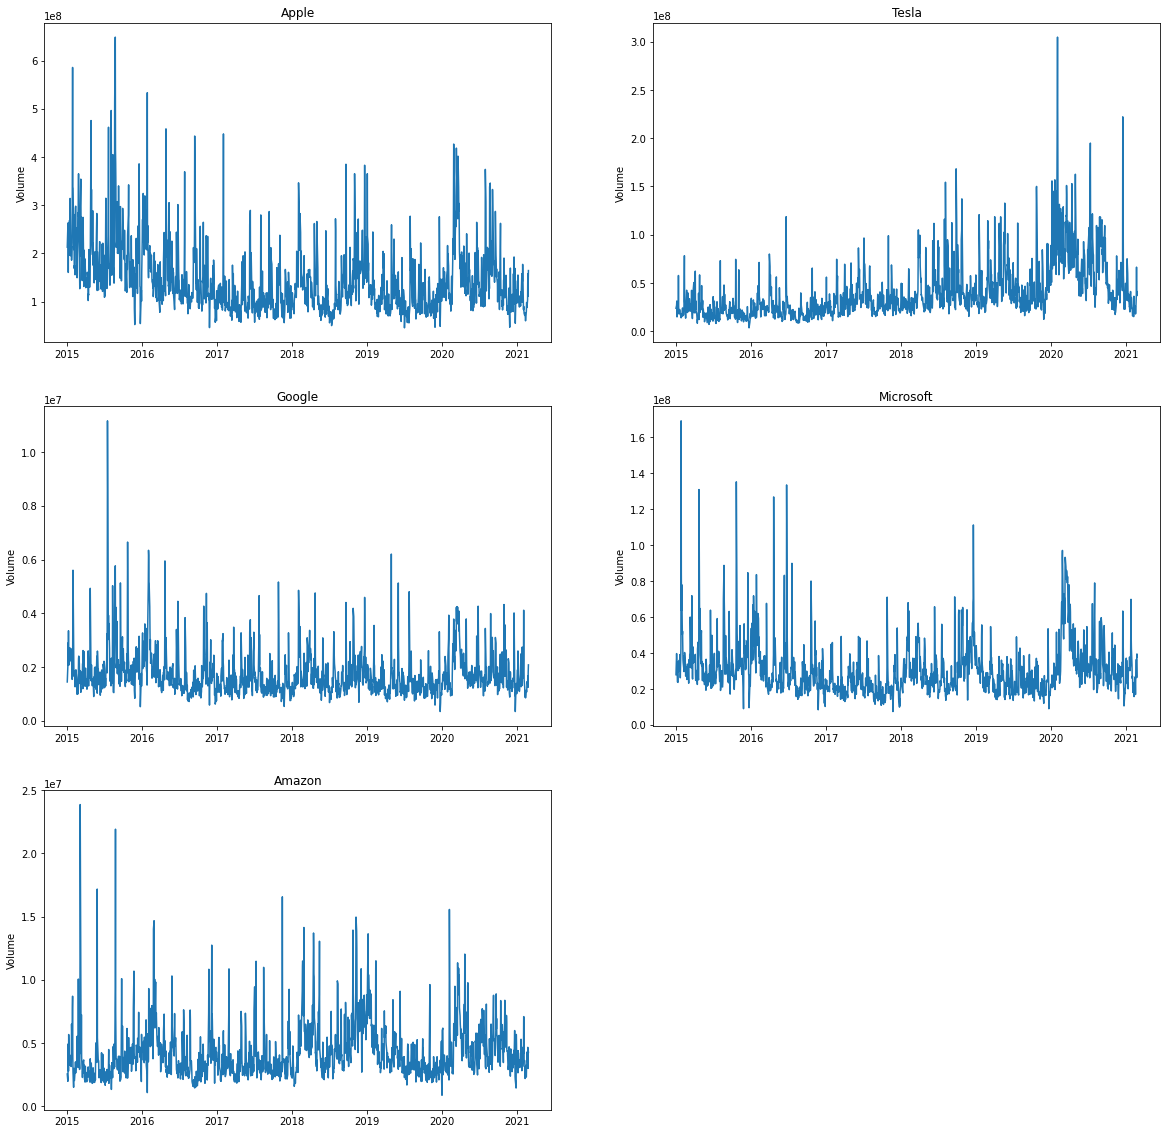

In [19]:
plt.figure(figsize=(20,20))

for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company['Date'],company['Volume'])
    plt.title(Companies_Title[index])
    plt.ylabel('Volume')

### What was the moving average of the various stocks ?

In [20]:
Moving_Average_Days=[10,20,50]

for Moving_Average in Moving_Average_Days:
    for company in Companies:
        column_name=f'Moving Average for {Moving_Average} days'
        company[column_name]=company['Adj. Close'].
        rolling(Moving_Average).mean()


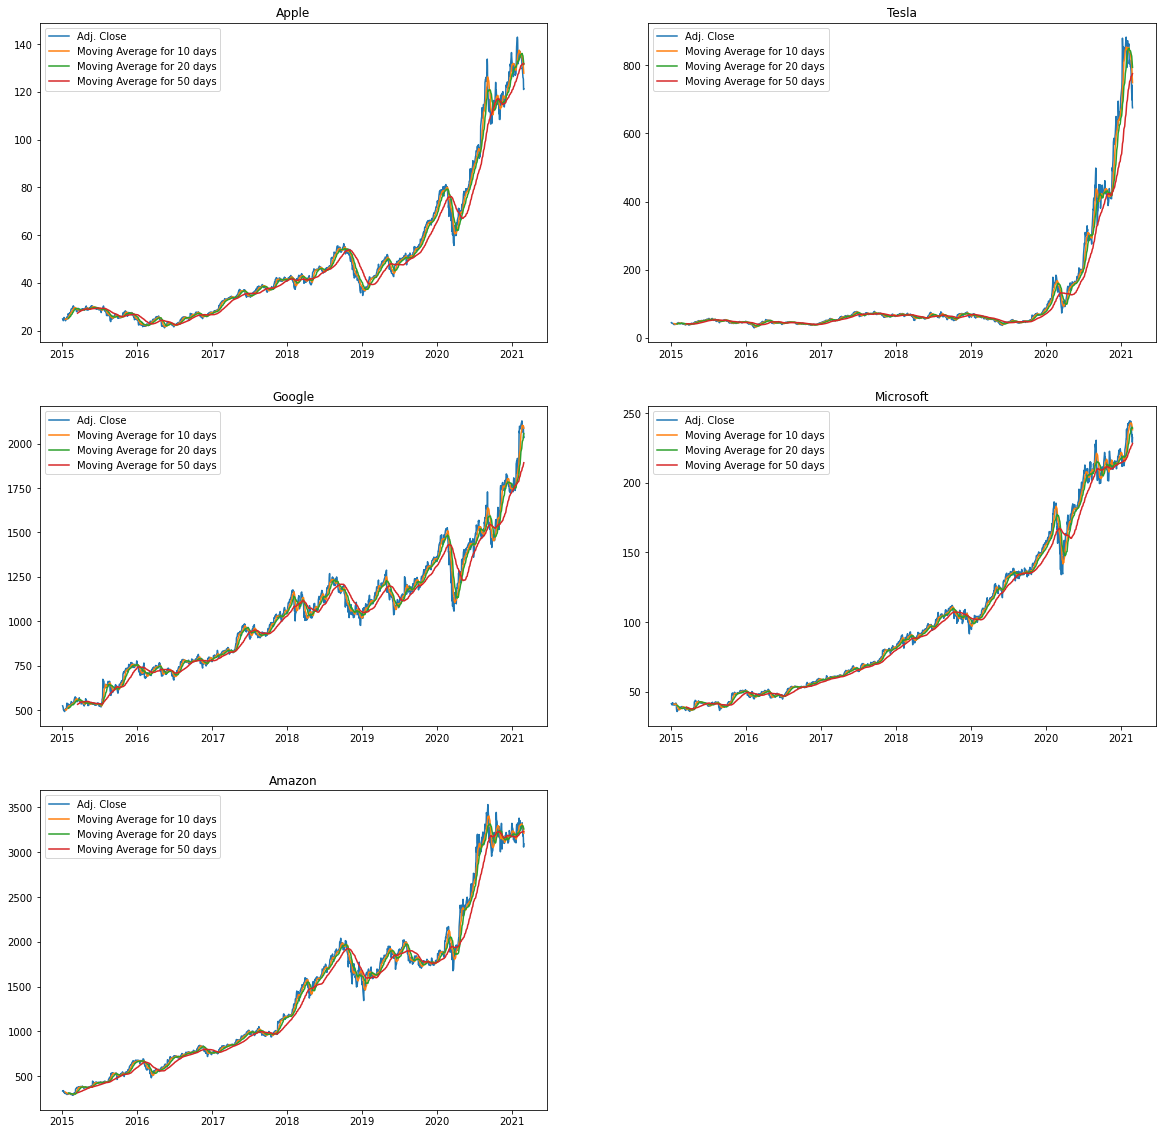

In [21]:
plt.figure(figsize=(20,20))

for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company['Date'],company['Adj. Close'])
    plt.plot(company['Date'],company['Moving Average for 10 days'])
    plt.plot(company['Date'],company['Moving Average for 20 days'])
    plt.plot(company['Date'],company['Moving Average for 50 days'])
    plt.title(Companies_Title[index])
    plt.legend(('Adj. Close','Moving Average for 10 days',
                'Moving Average for 20 days','Moving Average for 50 days'))

In [22]:
Moving_Average_Days_2=[100,200,500]

for Moving_Average in Moving_Average_Days_2:
    for company in Companies:
        column_name=f'Moving Average for {Moving_Average} days'
        company[column_name]=company['Adj. Close'].
        rolling(Moving_Average).mean()


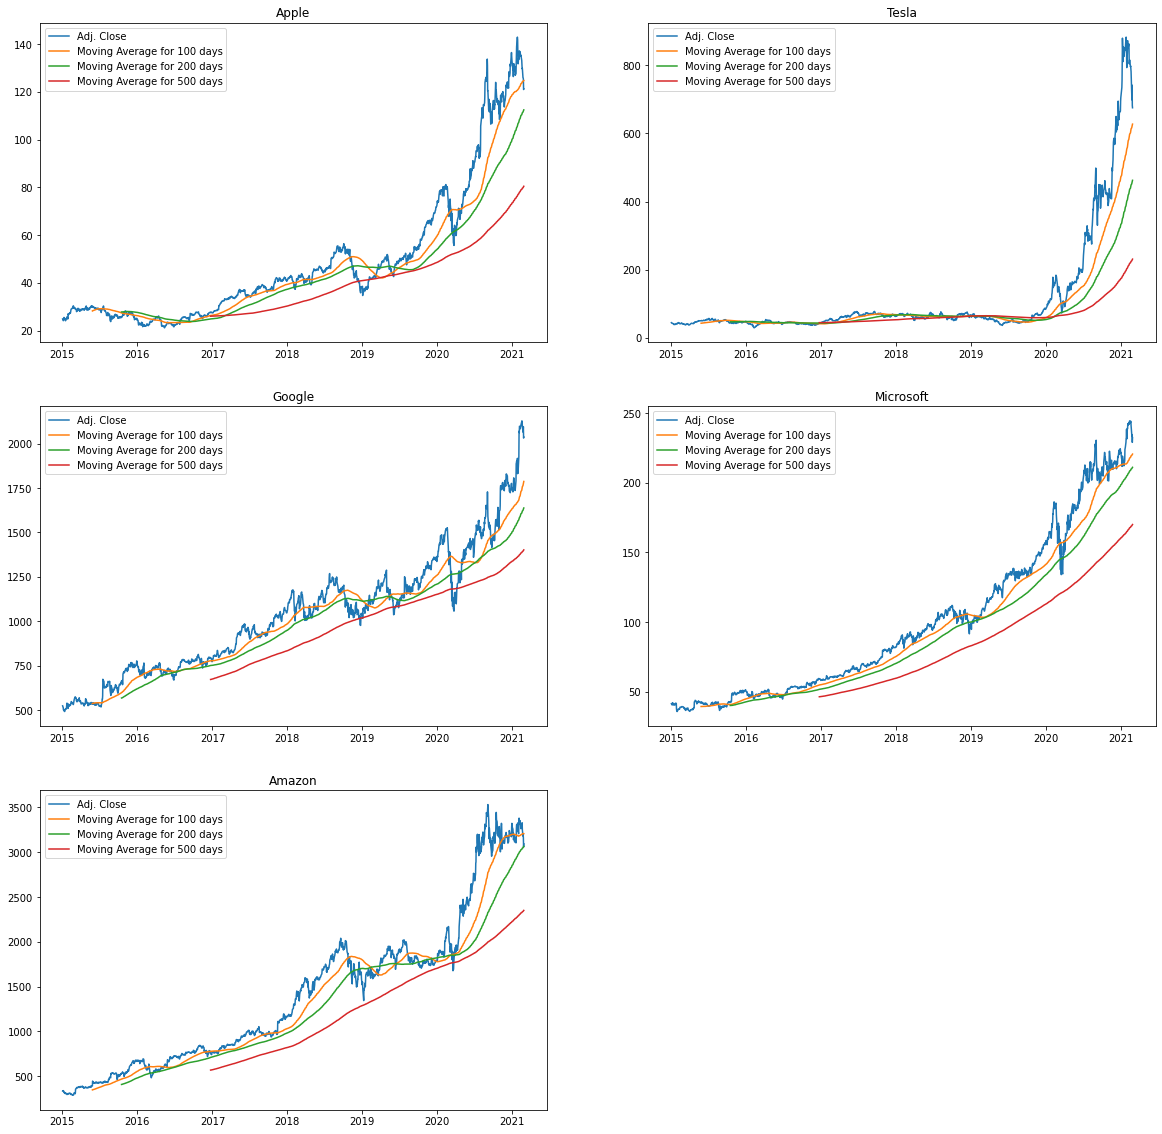

In [23]:
plt.figure(figsize=(20,20))

for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company['Date'],company['Adj. Close'])
    plt.plot(company['Date'],company['Moving Average for 100 days'])
    plt.plot(company['Date'],company['Moving Average for 200 days'])
    plt.plot(company['Date'],company['Moving Average for 500 days'])
    plt.title(Companies_Title[index])
    plt.legend(('Adj. Close','Moving Average for 100 days',
                'Moving Average for 200 days',
                'Moving Average for 500 days'))

### What was the daily return of the stock on average ?

In [24]:
for company in Companies:
    company['Daily Return']=company['Adj. Close'].pct_change()

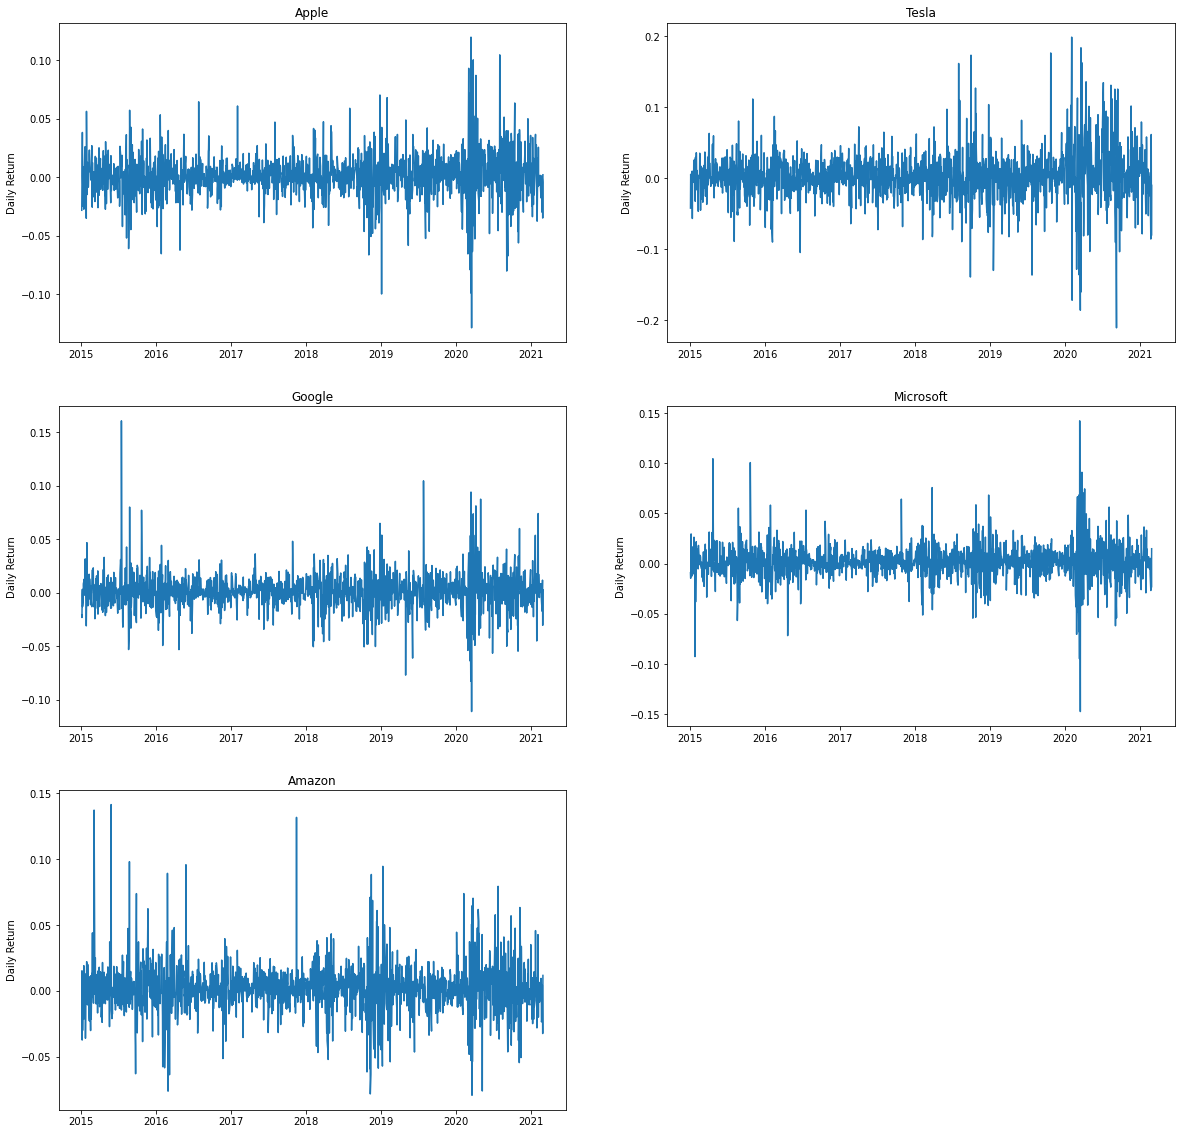

In [25]:
plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company['Date'],company['Daily Return'])
    plt.title(Companies_Title[index])
    plt.ylabel('Daily Return')

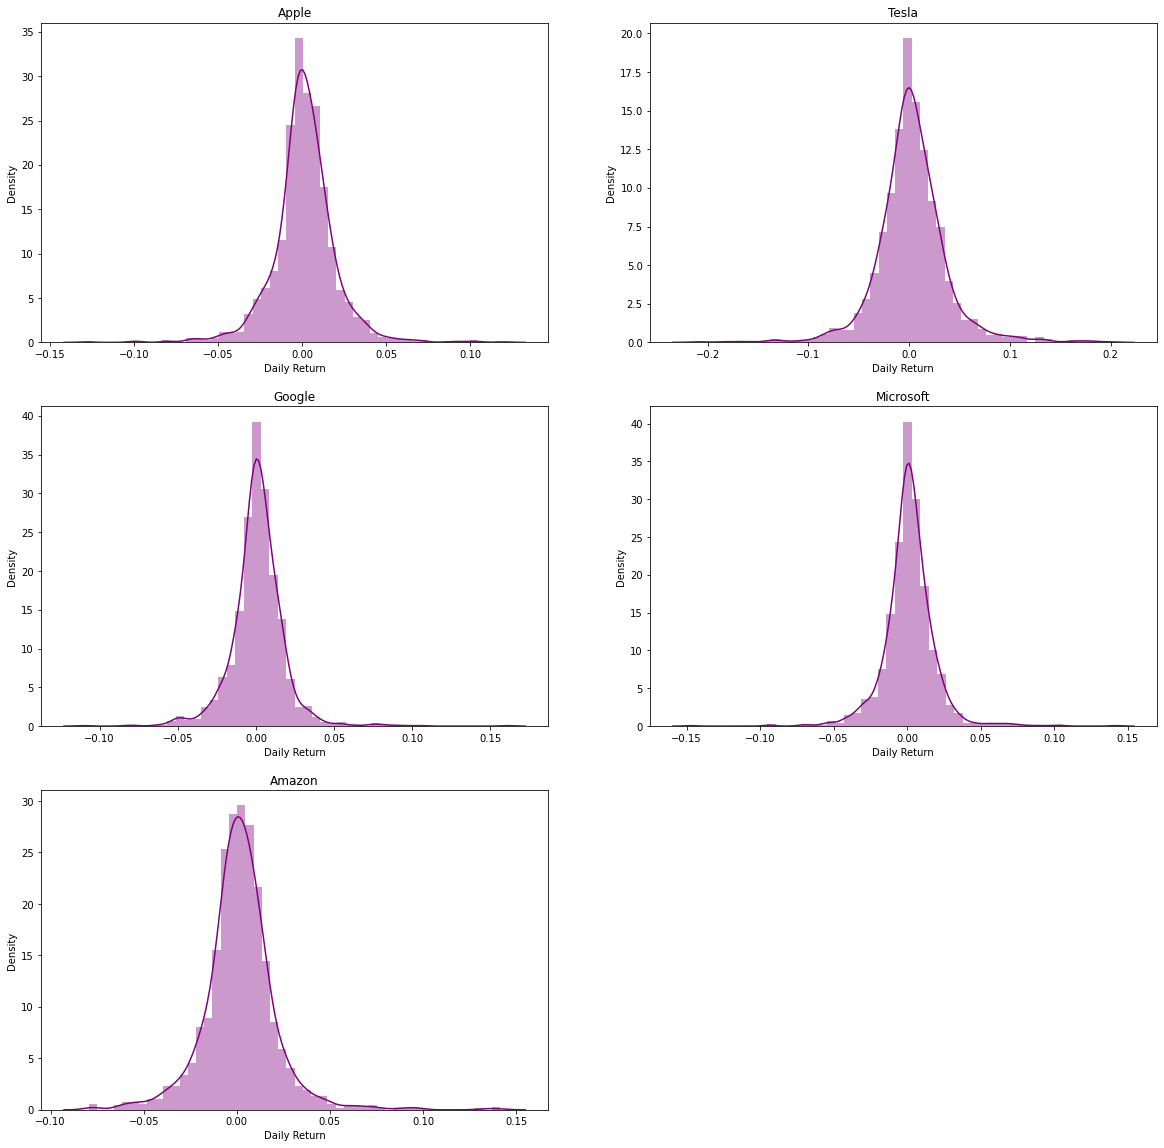

In [26]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    sns.distplot(company['Daily Return'].dropna(),color='purple')
    plt.title(Companies_Title[index])

In [27]:
print("Kurtosis value")
for index,company in enumerate(Companies):
    print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis value
Apple: 6.405686938843391
Tesla: 5.764945983385828
Google: 10.086026546409723
Microsoft: 10.603491741447666
Amazon: 7.041433562863504


### What was the correlation between diffrent stocks closing price ?

In [28]:
Companies_returns=pd.DataFrame()
Companies_returns['AAPL']=AAPL['Adj. Close']
Companies_returns['TSLA']=TSLA['Adj. Close']
Companies_returns['MSFT']=MSFT['Adj. Close']
Companies_returns['GOOG']=GOOG['Adj. Close']
Companies_returns['AMZN']=AMZN['Adj. Close']

In [29]:
Companies_returns.head()

,AAPL,TSLA,MSFT,GOOG,AMZN
0,24.86,43.86,41.44,523.37,335.04
1,24.16,42.02,41.06,512.46,333.57
2,24.16,42.26,40.46,500.59,338.64
3,24.50,42.19,40.97,499.73,326.00
4,25.44,42.12,42.18,501.30,326.31


In [30]:
Companies_Daily_returns=Companies_returns.pct_change()
Companies_Daily_returns.head()

,AAPL,TSLA,MSFT,GOOG,AMZN
0,NaN,NaN,NaN,NaN,NaN
1,-0.028158,-0.041952,-0.009170,-0.020846,-0.004388
2,0.000000,0.005712,-0.014613,-0.023163,0.015199
3,0.014073,-0.001656,0.012605,-0.001718,-0.037326
4,0.038367,-0.001659,0.029534,0.003142,0.000951


<AxesSubplot:>

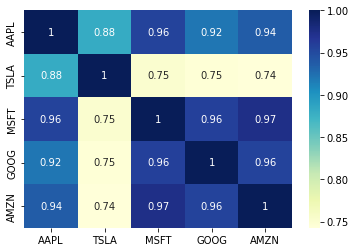

In [31]:
sns.heatmap(Companies_returns.corr(),annot=True,cmap='YlGnBu')

In [32]:
Companies_returns.corr()

,AAPL,TSLA,MSFT,GOOG,AMZN
AAPL,1.000000,0.881326,0.956366,0.919717,0.937317
TSLA,0.881326,1.000000,0.751496,0.745301,0.742543
MSFT,0.956366,0.751496,1.000000,0.957998,0.974242
GOOG,0.919717,0.745301,0.957998,1.000000,0.956704
AMZN,0.937317,0.742543,0.974242,0.956704,1.000000


In [33]:
Companies_Daily_returns.corr()

,AAPL,TSLA,MSFT,GOOG,AMZN
AAPL,1.000000,0.379490,0.682408,0.599042,-0.029361
TSLA,0.379490,1.000000,0.394718,0.349043,0.020527
MSFT,0.682408,0.394718,1.000000,0.727382,-0.033594
GOOG,0.599042,0.349043,0.727382,1.000000,-0.002388
AMZN,-0.029361,0.020527,-0.033594,-0.002388,1.000000


<AxesSubplot:>

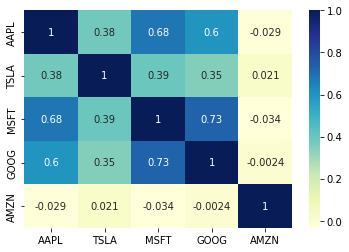

In [34]:
sns.heatmap(Companies_Daily_returns.corr(),annot=True,cmap='YlGnBu')

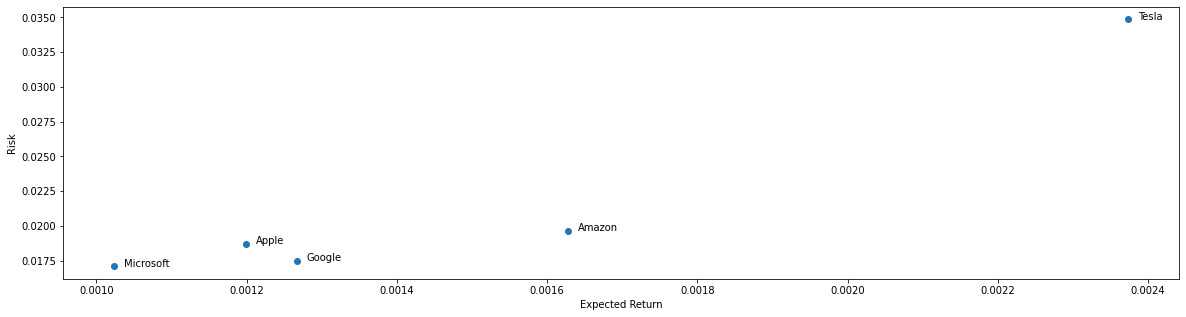

In [35]:
Return=Companies_Daily_returns.dropna()

plt.figure(figsize=(20,5))
plt.scatter(Return.mean(),Return.std())
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(Companies_Title,Return.mean(),Return.std()):
    plt.annotate(label,xy=(x,y),xytext=(10,0),textcoords='offset points')

In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import  scipy.signal.signaltools
import warnings
warnings.filterwarnings('ignore')

In [37]:
def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [38]:
from pmdarima.arima import auto_arima

In [39]:
Pre_Processed_AAPL=pd.read_csv("Database/Pre_Processed_AAPL.csv")
Pre_Processed_TSLA=pd.read_csv("Database/Pre_Processed_TSLA.csv")
Pre_Processed_GOOG=pd.read_csv("Database/Pre_Processed_GOOG.csv")
Pre_Processed_MSFT=pd.read_csv("Database/Pre_Processed_MSFT.csv")
Pre_Processed_AMZN=pd.read_csv("Database/Pre_Processed_AMZN.csv")

In [40]:
Pre_Processed_AAPL

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0
...,...,...,...,...,...,...,...
1544,2021-02-22,128.01,129.72,125.60,126.00,126.00,103607600.0
1545,2021-02-23,123.76,126.71,118.39,125.86,125.86,157859100.0
1546,2021-02-24,124.94,125.56,122.23,125.35,125.35,110691500.0
1547,2021-02-25,124.68,126.46,120.54,120.99,120.99,147306500.0


In [41]:
AAPL

,Date,Open,High,Low,Close,Adj. Close,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Moving Average for 100 days,Moving Average for 200 days,Moving Average for 500 days,Daily Return
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.028158
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0,NaN,NaN,NaN,NaN,NaN,NaN,0.014073
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.038367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,2021-02-22,128.01,129.72,125.60,126.00,126.00,103607600.0,132.842,135.0495,131.7392,124.3926,111.53640,79.81000,-0.029799
1545,2021-02-23,123.76,126.71,118.39,125.86,125.86,157859100.0,131.737,134.2070,131.8244,124.5140,111.78895,79.97692,-0.001111
1546,2021-02-24,124.94,125.56,122.23,125.35,125.35,110691500.0,130.671,133.3270,131.8702,124.6131,112.03000,80.14192,-0.004052
1547,2021-02-25,124.68,126.46,120.54,120.99,120.99,147306500.0,129.231,132.2840,131.8454,124.6589,112.24315,80.29778,-0.034783


In [42]:
def Test_Stationarity(timeseries):
    result=adfuller(timeseries['Adj. Close'],autolag='AIC')
    print('Results of Dickey Fuller Test')
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of legs used: {result[2]}')
    print(f'Number of Observations used: {result[3]}')
    for key,value in result[4].items():
        print(f'critical value ({key}):{value}')
    

In [43]:
Pre_Processed_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [44]:
Pre_Processed_AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0


In [45]:
Pre_Processed_AAPL['Date']=pd.to_datetime(Pre_Processed_AAPL["Date"])

In [46]:
Pre_Processed_AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0


In [47]:
Pre_Processed_AAPL

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0
...,...,...,...,...,...,...,...
1544,2021-02-22,128.01,129.72,125.60,126.00,126.00,103607600.0
1545,2021-02-23,123.76,126.71,118.39,125.86,125.86,157859100.0
1546,2021-02-24,124.94,125.56,122.23,125.35,125.35,110691500.0
1547,2021-02-25,124.68,126.46,120.54,120.99,120.99,147306500.0


In [48]:
Test_Stationarity(Pre_Processed_AAPL)

Results of Dickey Fuller Test
Test Statistics: 1.1207222064433595
p-value: 0.9953896550774386
Number of legs used: 24
Number of Observations used: 1524
critical value (1%):-3.4346481290263013
critical value (5%):-2.8634383565975736
critical value (10%):-2.567780658251872


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

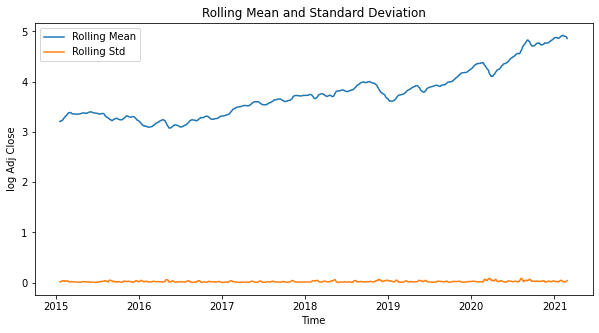

In [49]:
Pre_Processed_AAPL['log Adj Close']=np.log(Pre_Processed_AAPL['Adj. Close'])
AAPL_log_moving_avg=Pre_Processed_AAPL['log Adj Close'].rolling(12).mean()
AAPL_log_std=Pre_Processed_AAPL['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_AAPL['Date'],AAPL_log_moving_avg,label='Rolling Mean')
plt.plot(Pre_Processed_AAPL['Date'],AAPL_log_std,label='Rolling Std')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')

### Split the data into training and test set

    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

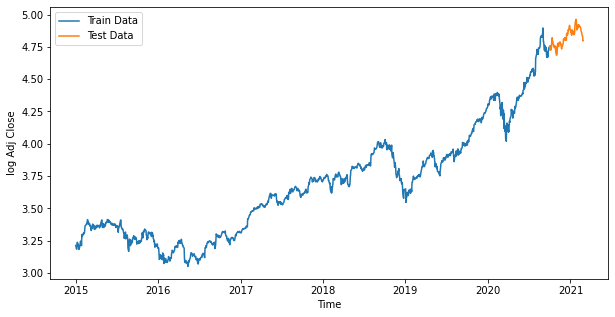

In [50]:
AAPL_Train_Data=Pre_Processed_AAPL[Pre_Processed_AAPL['Date']<'2020-10-01']
AAPL_Test_Data=Pre_Processed_AAPL[Pre_Processed_AAPL['Date']>='2020-10-01'].reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(AAPL_Train_Data['Date'],AAPL_Train_Data['log Adj Close'],label='Train Data')
plt.plot(AAPL_Test_Data['Date'],AAPL_Test_Data['log Adj Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

## Arima Modeling

In [51]:
AAPL_Auto_ARIMA_Model=auto_arima(AAPL_Train_Data['log Adj Close'],seasonal=False,
                                error_action='ignore',suppress_warnings=True)
print(AAPL_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3721.627
Date:                Sat, 30 Apr 2022   AIC                          -7437.254
Time:                        07:42:22   BIC                          -7421.424
Sample:                             0   HQIC                         -7431.346
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.366      0.018       0.000       0.002
ar.L1         -0.0981      0.015     -6.535      0.000      -0.127      -0.069
sigma2         0.0003   6.51e-06     52.314      0.0

In [52]:
AAPL_ARIMA_Model=ARIMA(AAPL_Train_Data['log Adj Close'],order=(1,1,0))
AAPL_ARIMA_fit=AAPL_ARIMA_Model.fit()
print(AAPL_ARIMA_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.log Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3721.627
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sat, 30 Apr 2022   AIC                          -7437.254
Time:                        07:42:22   BIC                          -7421.424
Sample:                             1   HQIC                         -7431.346
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0011      0.000      2.405      0.016       0.000       0.002
ar.L1.D.log Adj Close    -0.0982      0.026     -3.748      0.000      -0.150      -0.047
        

In [53]:
AAPL_Output=AAPL_ARIMA_fit.forecast(102,alpha=0.05)
AAPL_predictions=np.exp(AAPL_Output[0])

In [54]:
AAPL_predictions

array([115.40462228, 115.54287713, 115.66422106, 115.78737049,
       115.91048613, 116.03374888, 116.15714112, 116.28066474,
       116.4043197 , 116.52810615, 116.65202424, 116.77607411,
       116.9002559 , 117.02456974, 117.14901578, 117.27359416,
       117.39830502, 117.52314849, 117.64812473, 117.77323387,
       117.89847605, 118.02385142, 118.14936012, 118.27500228,
       118.40077805, 118.52668758, 118.652731  , 118.77890845,
       118.90522009, 119.03166605, 119.15824647, 119.2849615 ,
       119.41181128, 119.53879596, 119.66591567, 119.79317057,
       119.92056079, 120.04808648, 120.17574778, 120.30354484,
       120.4314778 , 120.55954681, 120.68775201, 120.81609354,
       120.94457156, 121.0731862 , 121.20193761, 121.33082594,
       121.45985133, 121.58901393, 121.71831388, 121.84775133,
       121.97732643, 122.10703932, 122.23689015, 122.36687907,
       122.49700622, 122.62727174, 122.7576758 , 122.88821853,
       123.01890008, 123.1497206 , 123.28068023, 123.41

In [55]:
AAPL_predictions.shape

(102,)

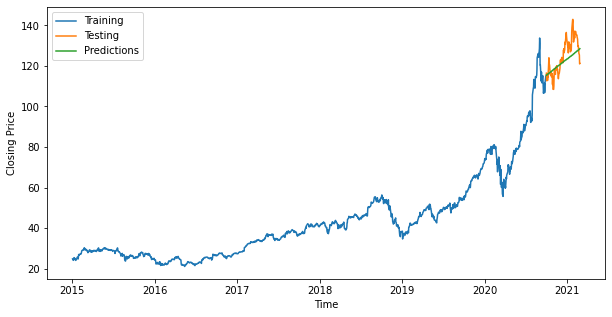

In [56]:
plt.figure(figsize=(10,5))

plt.plot(AAPL_Train_Data['Date'], AAPL_Train_Data['Adj. Close'], label = 'Training')
plt.plot(AAPL_Test_Data['Date'], AAPL_Test_Data['Adj. Close'], label = 'Testing')
plt.plot(AAPL_Test_Data['Date'], AAPL_predictions, label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [57]:
import math
rmse = math.sqrt(mean_squared_error(AAPL_Test_Data['Adj. Close'], AAPL_predictions))
mape = np.mean(np.abs(AAPL_predictions - AAPL_Test_Data['Adj. Close'])/np.abs(AAPL_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.40638330886213
MAPE: 0.03885097111051423


In [58]:
AAPL_Test_Data.shape

(102, 8)

In [59]:
AAPL_Test_Data['Adj. Close']

0      116.41
1      112.66
2      116.13
3      112.80
4      114.71
        ...  
97     126.00
98     125.86
99     125.35
100    120.99
101    121.26
Name: Adj. Close, Length: 102, dtype: float64

In [60]:
AAPL['Adj. Close']

0        24.86
1        24.16
2        24.16
3        24.50
4        25.44
         ...  
1544    126.00
1545    125.86
1546    125.35
1547    120.99
1548    121.26
Name: Adj. Close, Length: 1549, dtype: float64

### Change Dtype of Date column

In [61]:
Pre_Processed_AMZN['Date']=pd.to_datetime(Pre_Processed_AAPL['Date'])
Pre_Processed_GOOG['Date']=pd.to_datetime(Pre_Processed_GOOG['Date'])
Pre_Processed_MSFT['Date']=pd.to_datetime(Pre_Processed_MSFT['Date'])
Pre_Processed_TSLA['Date']=pd.to_datetime(Pre_Processed_TSLA['Date'])

## Dickey-Fuller Test or adfuller Test

In [62]:
Test_Stationarity(Pre_Processed_AMZN)

Results of Dickey Fuller Test
Test Statistics: 0.27034096344049613
p-value: 0.9759420712303006
Number of legs used: 18
Number of Observations used: 1530
critical value (1%):-3.434631245212095
critical value (5%):-2.8634309048528066
critical value (10%):-2.5677766901619035


In [63]:
Test_Stationarity(Pre_Processed_GOOG)

Results of Dickey Fuller Test
Test Statistics: 0.6722962942047412
p-value: 0.9892684650395426
Number of legs used: 22
Number of Observations used: 1526
critical value (1%):-3.4346424863111396
critical value (5%):-2.8634358661653803
critical value (10%):-2.5677793320839823


In [64]:
Test_Stationarity(Pre_Processed_MSFT)

Results of Dickey Fuller Test
Test Statistics: 2.1271168914605756
p-value: 0.9988169756931882
Number of legs used: 24
Number of Observations used: 1524
critical value (1%):-3.4346481290263013
critical value (5%):-2.8634383565975736
critical value (10%):-2.567780658251872


In [65]:
Test_Stationarity(Pre_Processed_TSLA)

Results of Dickey Fuller Test
Test Statistics: 0.399800627348105
p-value: 0.9814874842817934
Number of legs used: 24
Number of Observations used: 1524
critical value (1%):-3.4346481290263013
critical value (5%):-2.8634383565975736
critical value (10%):-2.567780658251872


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

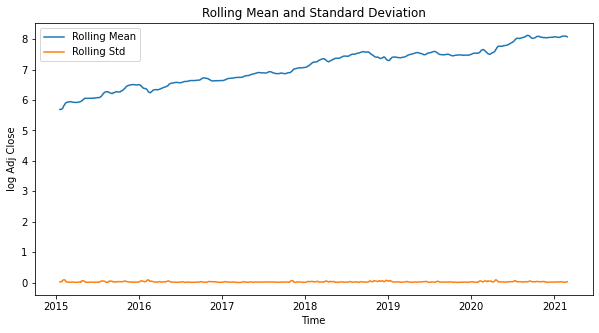

In [66]:
Pre_Processed_AMZN['log Adj Close']=np.log(Pre_Processed_AMZN['Adj. Close'])
AMZN_log_moving_avg=Pre_Processed_AMZN['log Adj Close'].rolling(12).mean()
AMZN_log_std=Pre_Processed_AMZN['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_AMZN['Date'],AMZN_log_moving_avg,label='Rolling Mean')
plt.plot(Pre_Processed_AMZN['Date'],AMZN_log_std,label='Rolling Std')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

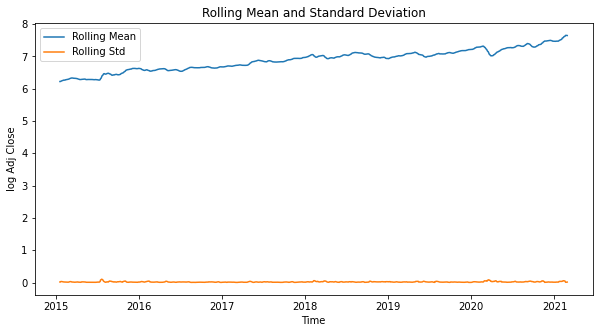

In [67]:
Pre_Processed_GOOG['log Adj Close']=np.log(Pre_Processed_GOOG['Adj. Close'])
GOOG_log_moving_avg=Pre_Processed_GOOG['log Adj Close'].rolling(12).mean()
GOOG_log_std=Pre_Processed_GOOG['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_GOOG['Date'],GOOG_log_moving_avg,label='Rolling Mean')
plt.plot(Pre_Processed_GOOG['Date'],GOOG_log_std,label='Rolling Std')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

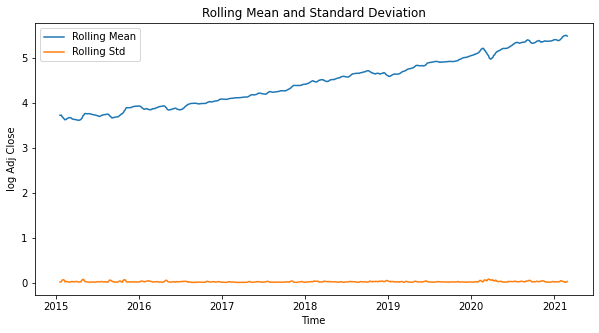

In [68]:
Pre_Processed_MSFT['log Adj Close']=np.log(Pre_Processed_MSFT['Adj. Close'])
MSFT_log_moving_avg=Pre_Processed_MSFT['log Adj Close'].rolling(12).mean()
MSFT_log_std=Pre_Processed_MSFT['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_MSFT['Date'],MSFT_log_moving_avg,label='Rolling Mean')
plt.plot(Pre_Processed_MSFT['Date'],MSFT_log_std,label='Rolling Std')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

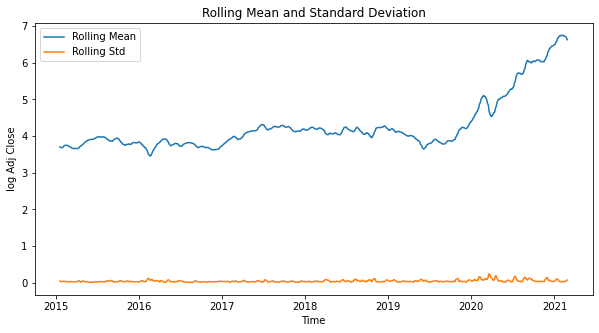

In [69]:
Pre_Processed_TSLA['log Adj Close']=np.log(Pre_Processed_TSLA['Adj. Close'])
TSLA_log_moving_avg=Pre_Processed_TSLA['log Adj Close'].rolling(12).mean()
TSLA_log_std=Pre_Processed_TSLA['log Adj Close'].rolling(12).std()

plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_TSLA['Date'],TSLA_log_moving_avg,label='Rolling Mean')
plt.plot(Pre_Processed_TSLA['Date'],TSLA_log_std,label='Rolling Std')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')


### Split the data into training and test set
Training Period: 2015-01-02 - 2020-09-30

Testing Period:  2020-10-01 - 2021-02-26

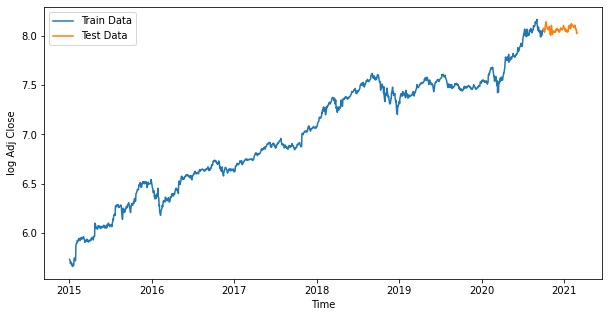

In [70]:
AMZN_Train_Data=Pre_Processed_AMZN[Pre_Processed_AMZN['Date']<'2020-10-01']
AMZN_Test_Data=Pre_Processed_AMZN[Pre_Processed_AMZN['Date']>='2020-10-01'].reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(AMZN_Train_Data['Date'],AMZN_Train_Data['log Adj Close'],label='Train Data')
plt.plot(AMZN_Test_Data['Date'],AMZN_Test_Data['log Adj Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

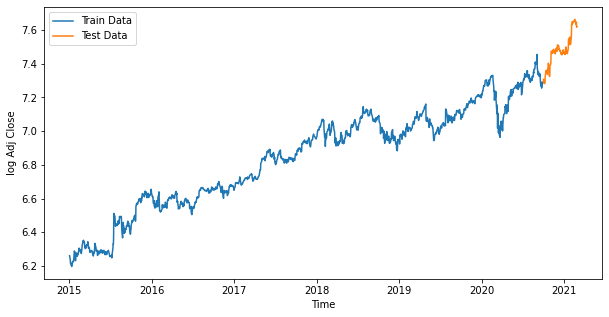

In [71]:
GOOG_Train_Data=Pre_Processed_GOOG[Pre_Processed_GOOG['Date']<'2020-10-01']
GOOG_Test_Data=Pre_Processed_GOOG[Pre_Processed_GOOG['Date']>='2020-10-01'].reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(GOOG_Train_Data['Date'],GOOG_Train_Data['log Adj Close'],label='Train Data')
plt.plot(GOOG_Test_Data['Date'],GOOG_Test_Data['log Adj Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

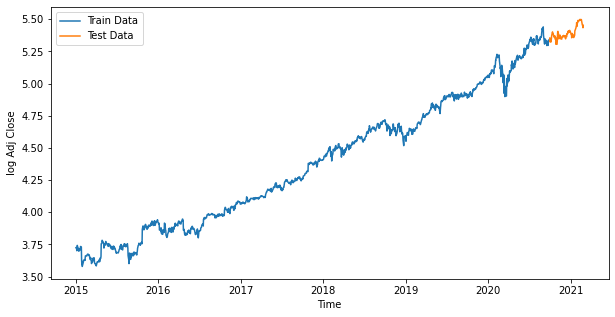

In [72]:
MSFT_Train_Data=Pre_Processed_MSFT[Pre_Processed_MSFT['Date']<'2020-10-01']
MSFT_Test_Data=Pre_Processed_MSFT[Pre_Processed_MSFT['Date']>='2020-10-01'].reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(MSFT_Train_Data['Date'],MSFT_Train_Data['log Adj Close'],label='Train Data')
plt.plot(MSFT_Test_Data['Date'],MSFT_Test_Data['log Adj Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

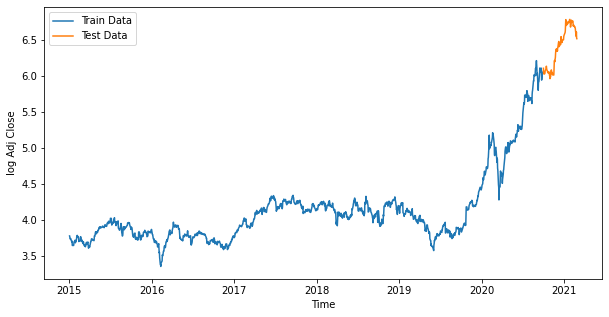

In [73]:
TSLA_Train_Data=Pre_Processed_TSLA[Pre_Processed_TSLA['Date']<'2020-10-01']
TSLA_Test_Data=Pre_Processed_TSLA[Pre_Processed_TSLA['Date']>='2020-10-01'].reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(TSLA_Train_Data['Date'],TSLA_Train_Data['log Adj Close'],label='Train Data')
plt.plot(TSLA_Test_Data['Date'],TSLA_Test_Data['log Adj Close'],label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

## ARIMA Modeling

In [74]:
AMZN_Auto_ARIMA_Model=auto_arima(AMZN_Train_Data['log Adj Close'],seasonal=False,
                                 error_action='ignore',supress_warnings=True)

print(AMZN_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3656.945
Date:                Sat, 30 Apr 2022   AIC                          -7309.891
Time:                        07:42:28   BIC                          -7299.338
Sample:                             0   HQIC                         -7305.952
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      3.109      0.002       0.001       0.003
sigma2         0.0004   6.81e-06     54.681      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.93   Jarque-

In [75]:
AMZN_ARIMA_Model=ARIMA(AMZN_Train_Data['log Adj Close'],order=(1,1,0))
AMZN_ARIMA_Model_fit=AMZN_ARIMA_Model.fit()
print(AMZN_ARIMA_Model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.log Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3657.409
Method:                       css-mle   S.D. of innovations              0.019
Date:                Sat, 30 Apr 2022   AIC                          -7308.818
Time:                        07:42:28   BIC                          -7292.988
Sample:                             1   HQIC                         -7302.910
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0016      0.000      3.248      0.001       0.001       0.003
ar.L1.D.log Adj Close    -0.0253      0.026     -0.963      0.335      -0.077       0.026
        

In [76]:
MSFT_Auto_ARIMA_Model=auto_arima(MSFT_Train_Data['log Adj Close'],seasonal=False,
                                 error_action='ignore',supress_warnings=True)

print(MSFT_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3828.056
Date:                Sat, 30 Apr 2022   AIC                          -7650.112
Time:                        07:42:30   BIC                          -7634.282
Sample:                             0   HQIC                         -7644.204
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.000      2.995      0.003       0.000       0.002
ar.L1         -0.2169      0.012    -18.786      0.000      -0.239      -0.194
sigma2         0.0003   5.01e-06     58.650      0.0

In [77]:
MSFT_ARIMA_Model=ARIMA(MSFT_Train_Data['log Adj Close'],order=(1,1,0))
MSFT_ARIMA_Model_fit=MSFT_ARIMA_Model.fit()
print(MSFT_ARIMA_Model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.log Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3828.056
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sat, 30 Apr 2022   AIC                          -7650.112
Time:                        07:42:30   BIC                          -7634.283
Sample:                             1   HQIC                         -7644.204
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0011      0.000      3.022      0.003       0.000       0.002
ar.L1.D.log Adj Close    -0.2168      0.026     -8.445      0.000      -0.267      -0.166
        

In [78]:
GOOG_Auto_ARIMA_Model=auto_arima(GOOG_Train_Data['log Adj Close'],seasonal=False,
                                 error_action='ignore',supress_warnings=True)

print(GOOG_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 2)   Log Likelihood                3861.246
Date:                Sat, 30 Apr 2022   AIC                          -7712.492
Time:                        07:42:37   BIC                          -7686.109
Sample:                             0   HQIC                         -7702.645
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.751      0.080      -0.000       0.003
ar.L1         -0.8576      0.065    -13.249      0.000      -0.984      -0.731
ma.L1          0.7839      0.070     11.235      0.0

In [79]:
GOOG_ARIMA_Model=ARIMA(GOOG_Train_Data['log Adj Close'],order=(1,1,0))
GOOG_ARIMA_Model_fit=GOOG_ARIMA_Model.fit()
print(GOOG_ARIMA_Model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.log Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3856.370
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sat, 30 Apr 2022   AIC                          -7706.740
Time:                        07:42:37   BIC                          -7690.911
Sample:                             1   HQIC                         -7700.832
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0007      0.000      1.756      0.079   -8.31e-05       0.002
ar.L1.D.log Adj Close    -0.0853      0.026     -3.256      0.001      -0.137      -0.034
        

In [80]:
TSLA_Auto_ARIMA_Model=auto_arima(TSLA_Train_Data['log Adj Close'],seasonal=False,
                                 error_action='ignore',supress_warnings=True)

print(TSLA_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(5, 2, 2)   Log Likelihood                2805.158
Date:                Sat, 30 Apr 2022   AIC                          -5592.316
Time:                        07:43:01   BIC                          -5544.833
Sample:                             0   HQIC                         -5574.594
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.024e-06   3.18e-05     -0.126      0.899   -6.64e-05    5.84e-05
ar.L1         -0.7201      5.830     -0.124      0.902     -12.147      10.707
ar.L2          0.0677      0.188      0.360      0.7

In [81]:
TSLA_ARIMA_Model=ARIMA(TSLA_Train_Data['log Adj Close'],order=(1,1,0))
TSLA_ARIMA_Model_fit=TSLA_ARIMA_Model.fit()
print(TSLA_ARIMA_Model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.log Adj Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2812.213
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sat, 30 Apr 2022   AIC                          -5618.426
Time:                        07:43:01   BIC                          -5602.597
Sample:                             1   HQIC                         -5612.518
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0016      0.001      1.718      0.086      -0.000       0.003
ar.L1.D.log Adj Close     0.0089      0.026      0.337      0.736      -0.043       0.060
        

## Predicting the closing stock price

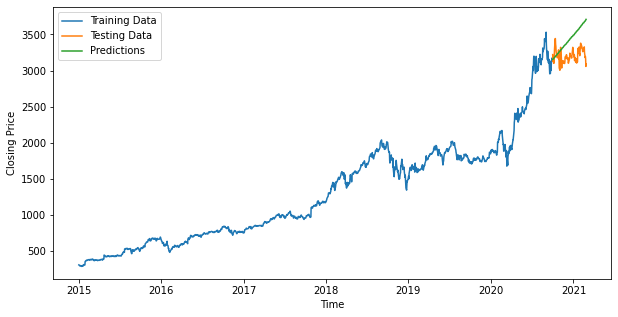

In [82]:
AMZN_output=AMZN_ARIMA_Model_fit.forecast(102,alpha=0.05)
AMZN_predictions=np.exp(AMZN_output[0])

plt.figure(figsize=(10,5))
plt.plot(AMZN_Train_Data['Date'],AMZN_Train_Data['Adj. Close'],label='Training Data')
plt.plot(AMZN_Test_Data['Date'],AMZN_Test_Data['Adj. Close'],label='Testing Data')
plt.plot(AMZN_Test_Data['Date'],AMZN_predictions,label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

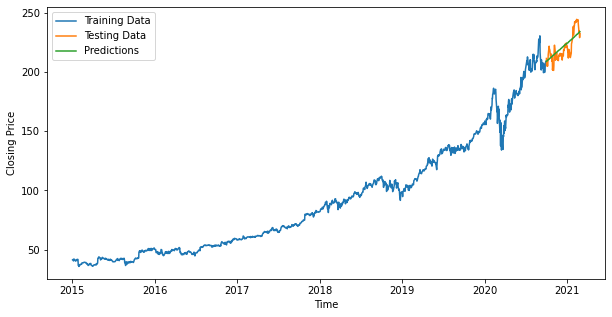

In [83]:
MSFT_output=MSFT_ARIMA_Model_fit.forecast(102,alpha=0.05)
MSFT_predictions=np.exp(MSFT_output[0])

plt.figure(figsize=(10,5))
plt.plot(MSFT_Train_Data['Date'],MSFT_Train_Data['Adj. Close'],label='Training Data')
plt.plot(MSFT_Test_Data['Date'],MSFT_Test_Data['Adj. Close'],label='Testing Data')
plt.plot(MSFT_Test_Data['Date'],MSFT_predictions,label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

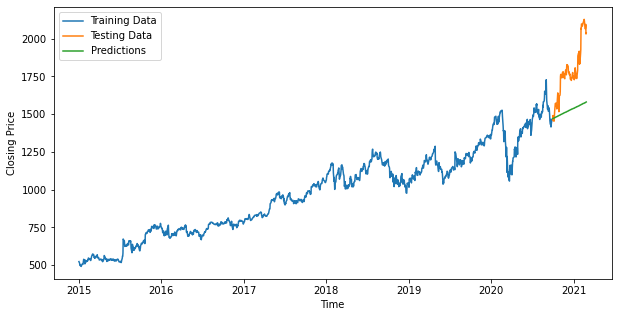

In [84]:
GOOG_output=GOOG_ARIMA_Model_fit.forecast(102,alpha=0.05)
GOOG_predictions=np.exp(GOOG_output[0])

plt.figure(figsize=(10,5))
plt.plot(GOOG_Train_Data['Date'],GOOG_Train_Data['Adj. Close'],label='Training Data')
plt.plot(GOOG_Test_Data['Date'],GOOG_Test_Data['Adj. Close'],label='Testing Data')
plt.plot(GOOG_Test_Data['Date'],GOOG_predictions,label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

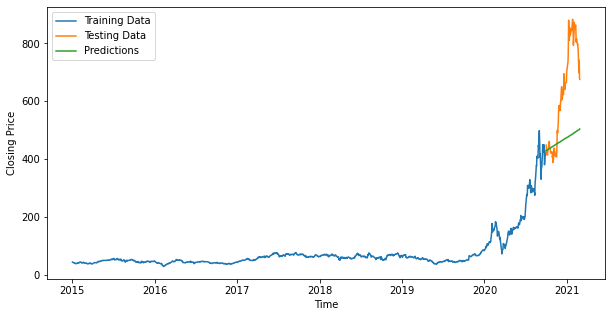

In [85]:
TSLA_output=TSLA_ARIMA_Model_fit.forecast(102,alpha=0.05)
TSLA_predictions=np.exp(TSLA_output[0])

plt.figure(figsize=(10,5))
plt.plot(TSLA_Train_Data['Date'],TSLA_Train_Data['Adj. Close'],label='Training Data')
plt.plot(TSLA_Test_Data['Date'],TSLA_Test_Data['Adj. Close'],label='Testing Data')
plt.plot(TSLA_Test_Data['Date'],TSLA_predictions,label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [86]:
AMZN_rmse=math.sqrt(mean_squared_error(AMZN_Test_Data['Adj. Close'],AMZN_predictions))
AMZN_mape=np.mean(np.abs(AMZN_predictions-AMZN_Test_Data['Adj. Close'])/np.abs(AMZN_Test_Data['Adj. Close']))
print(f'AMZN_rmse: {AMZN_rmse}')
print(f'AMZN_mape: {AMZN_mape}')

AMZN_rmse: 276.60075201640444
AMZN_mape: 0.0754540916830774


In [87]:
MSFT_rmse=math.sqrt(mean_squared_error(MSFT_Test_Data['Adj. Close'],MSFT_predictions))
MSFT_mape=np.mean(np.abs(MSFT_predictions-MSFT_Test_Data['Adj. Close'])/np.abs(MSFT_Test_Data['Adj. Close']))
print(f'MSFT_rmse: {MSFT_rmse}')
print(f'MSFT_mape: {MSFT_mape}')

MSFT_rmse: 7.269511857823475
MSFT_mape: 0.027081035328618778


In [88]:
GOOG_rmse=math.sqrt(mean_squared_error(GOOG_Test_Data['Adj. Close'],GOOG_predictions))
GOOG_mape=np.mean(np.abs(GOOG_predictions-GOOG_Test_Data['Adj. Close'])/np.abs(GOOG_Test_Data['Adj. Close']))
print(f'GOOG_rmse: {GOOG_rmse}')
print(f'GOOG_mape: {GOOG_mape}')

GOOG_rmse: 294.26774265350883
GOOG_mape: 0.13771930168099153


In [89]:
TSLA_rmse=math.sqrt(mean_squared_error(TSLA_Test_Data['Adj. Close'],TSLA_predictions))
TSLA_mape=np.mean(np.abs(TSLA_predictions-TSLA_Test_Data['Adj. Close'])/np.abs(TSLA_Test_Data['Adj. Close']))
print(f'TSLA_rmse: {TSLA_rmse}')
print(f'TSLA_mape: {TSLA_mape}')

TSLA_rmse: 217.65713807976203
TSLA_mape: 0.23244568260338674


In [90]:
import tensorflow as tf

In [91]:
def Dataset(Data,Date):
    
    Train_Data=Data['Adj. Close'][Data['Date']<Date].to_numpy()
    Data_Train=[]
    Data_Train_X=[]
    Data_Train_Y=[]
    for i  in range(0,len(Train_Data),5):
        try:
            Data_Train.append(Train_Data[i:i+5])
        except:
            pass
    
    if len(Data_Train[-1])<5:
        Data_Train.pop(-1)
        
    Data_Train_X=Data_Train[0:-1]
    Data_Train_X=np.array(Data_Train_X)
    Data_Train_X=Data_Train_X.reshape((-1,5,1))
    Data_Train_Y=Data_Train[1:len(Data_Train)]
    Data_Train_Y=np.array(Data_Train_Y)
    Data_Train_Y=Data_Train_Y.reshape((-1,5,1))
    
    
    
    Test_Data=Data['Adj. Close'][Data['Date']>=Date].to_numpy()
    Data_Test=[]
    Data_Test_X=[]
    Data_Test_Y=[]
    for i in range(0,len(Test_Data),5):
        try:
            Data_Test.append(Test_Data[i:i+5])
        except:
            pass
    
    if len(Data_Test[-1])<5:
        Data_Test.pop(-1)
        
    Data_Test_X=Data_Test[0:-1]
    Data_Test_X=np.array(Data_Test_X)
    Data_Test_X=Data_Test_X.reshape((-1,5,1))
    Data_Test_Y=Data_Test[1:len(Data_Test)]
    Data_Test_Y=np.array(Data_Test_Y)
    Data_Test_Y=Data_Test_Y.reshape((-1,5,1))
    
    return Data_Train_X,Data_Train_Y,Data_Test_X,Data_Test_Y

# Deep Learning Model

In [92]:
def Model():
    model=tf.keras.models.Sequential([
        tf.keras.layers.LSTM(200,input_shape=(5,1),activation=tf.nn.leaky_relu,return_sequences=True),
        tf.keras.layers.LSTM(200,activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(200,activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(100,activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(50,activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(5,activation=tf.nn.leaky_relu)
        
    ])
    return model

In [93]:
model=Model()

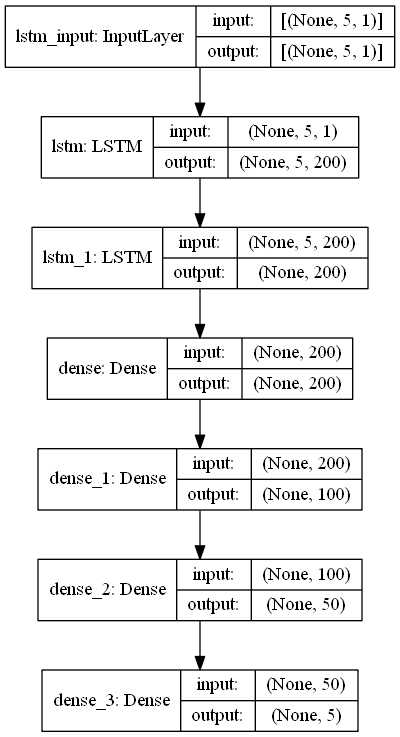

In [94]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
__________________________________________________

## Custom Learning Rate

In [96]:
def scheduler(epoch):
    
    if epoch <= 150:
        lrate=(10 ** -5)*(epoch / 150)
    elif epoch <= 400:
        initial_lrate=(10 ** -5)
        k=0.01
        lrate=initial_lrate * math.exp(-k * (epoch - 150))
    else:
        lrate=(10 ** -6)
        
    return lrate

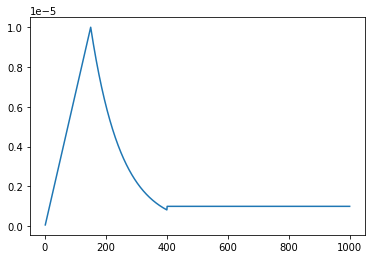

In [97]:
epochs=[i for i in range(1,1001,1)]
lrate=[scheduler(i) for i in range(1,1001,1)]
plt.plot(epochs,lrate)

In [98]:
callback=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [99]:
Pre_Processed_AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume,log Adj Close
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0,3.213260
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0,3.184698
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0,3.184698
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0,3.198673
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0,3.236323


In [100]:
Pre_Processed_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1549 non-null   datetime64[ns]
 1   Open           1549 non-null   float64       
 2   High           1549 non-null   float64       
 3   Low            1549 non-null   float64       
 4   Close          1549 non-null   float64       
 5   Adj. Close     1549 non-null   float64       
 6   Volume         1549 non-null   float64       
 7   log Adj Close  1549 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 96.9 KB


### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [101]:
AAPL_Date='2020-10-01'
AAPL_Train_X,AAPL_Train_Y,AAPL_Test_X,AAPL_Test_Y=
                Dataset(Pre_Processed_AAPL,AAPL_Date)

In [102]:
AMZN_Date='2020-10-01'
AMZN_Train_X,AMZN_Train_Y,AMZN_Test_X,AMZN_Test_Y=Dataset(Pre_Processed_AMZN,AMZN_Date)

In [103]:
MSFT_Date='2020-10-01'
MSFT_Train_X,MSFT_Train_Y,MSFT_Test_X,MSFT_Test_Y=Dataset(Pre_Processed_MSFT,MSFT_Date)

In [104]:
GOOG_Date='2020-10-01'
GOOG_Train_X,GOOG_Train_Y,GOOG_Test_X,GOOG_Test_Y=Dataset(Pre_Processed_GOOG,GOOG_Date)

In [105]:
TSLA_Date='2020-10-01'
TSLA_Train_X,TSLA_Train_Y,TSLA_Test_X,TSLA_Test_Y=Dataset(Pre_Processed_TSLA,TSLA_Date)

## Model Fitting

### Apple

In [106]:
AAPL_Model=Model()

In [107]:
AAPL_Model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='mse',
                   metrics=tf.keras.metrics.RootMeanSquaredError())

In [108]:
AAPL_hist=AAPL_Model.fit(AAPL_Train_X,AAPL_Train_Y,
                         epochs=1000,
                         validation_data=(AAPL_Test_X,AAPL_Test_Y),
                         callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 77ms/step - loss: 2304.6030 - root_mean_squared_error: 48.0063 - val_loss: 15650.6953 - val_root_mean_squared_error: 125.1027
Epoch 2/1000
9/9 [==============================] - 0s 20ms/step - loss: 2304.5889 - root_mean_squared_error: 48.0061 - val_loss: 15650.4141 - val_root_mean_squared_error: 125.1016
Epoch 3/1000
9/9 [==============================] - 0s 20ms/step - loss: 2304.5439 - root_mean_squared_error: 48.0057 - val_loss: 15649.8486 - val_root_mean_squared_error: 125.0994
Epoch 4/1000
9/9 [==============================] - 0s 18ms/step - loss: 2304.4719 - root_mean_squared_error: 48.0049 - val_loss: 15648.9766 - val_root_mean_squared_error: 125.0959
Epoch 5/1000
9/9 [==============================] - 0s 20ms/step - loss: 2304.3760 - root_mean_squared_error: 48.0039 - val_loss: 15647.7432 - val_root_mean_squared_error: 125.0909
Epoch 6/1000
9/9 [==============================] - 0s 21ms/step - loss: 2304.2332 - root_mean_

Epoch 46/1000
9/9 [==============================] - 0s 21ms/step - loss: 2250.2148 - root_mean_squared_error: 47.4364 - val_loss: 15202.9766 - val_root_mean_squared_error: 123.3004
Epoch 47/1000
9/9 [==============================] - 0s 23ms/step - loss: 2246.5293 - root_mean_squared_error: 47.3976 - val_loss: 15171.0459 - val_root_mean_squared_error: 123.1708
Epoch 48/1000
9/9 [==============================] - 0s 23ms/step - loss: 2242.6812 - root_mean_squared_error: 47.3570 - val_loss: 15136.0186 - val_root_mean_squared_error: 123.0285
Epoch 49/1000
9/9 [==============================] - 0s 26ms/step - loss: 2238.6003 - root_mean_squared_error: 47.3138 - val_loss: 15098.6943 - val_root_mean_squared_error: 122.8767
Epoch 50/1000
9/9 [==============================] - 0s 22ms/step - loss: 2234.2026 - root_mean_squared_error: 47.2674 - val_loss: 15061.4854 - val_root_mean_squared_error: 122.7252
Epoch 51/1000
9/9 [==============================] - 0s 22ms/step - loss: 2229.9502 - root

Epoch 137/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.9897 - root_mean_squared_error: 3.1606 - val_loss: 45.9099 - val_root_mean_squared_error: 6.7757
Epoch 138/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.7855 - root_mean_squared_error: 3.1282 - val_loss: 44.2448 - val_root_mean_squared_error: 6.6517
Epoch 139/1000
9/9 [==============================] - 0s 23ms/step - loss: 9.6170 - root_mean_squared_error: 3.1011 - val_loss: 43.2824 - val_root_mean_squared_error: 6.5789
Epoch 140/1000
9/9 [==============================] - 0s 25ms/step - loss: 9.4727 - root_mean_squared_error: 3.0778 - val_loss: 42.4180 - val_root_mean_squared_error: 6.5129
Epoch 141/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.3099 - root_mean_squared_error: 3.0512 - val_loss: 41.2229 - val_root_mean_squared_error: 6.4205
Epoch 142/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.1728 - root_mean_squared_error: 3.0287 - val_loss: 39

9/9 [==============================] - 0s 29ms/step - loss: 6.5481 - root_mean_squared_error: 2.5589 - val_loss: 27.1497 - val_root_mean_squared_error: 5.2105
Epoch 185/1000
9/9 [==============================] - 0s 27ms/step - loss: 6.4971 - root_mean_squared_error: 2.5489 - val_loss: 27.0731 - val_root_mean_squared_error: 5.2032
Epoch 186/1000
9/9 [==============================] - 0s 29ms/step - loss: 6.4952 - root_mean_squared_error: 2.5486 - val_loss: 27.2137 - val_root_mean_squared_error: 5.2167
Epoch 187/1000
9/9 [==============================] - 0s 23ms/step - loss: 6.4729 - root_mean_squared_error: 2.5442 - val_loss: 26.8411 - val_root_mean_squared_error: 5.1808
Epoch 188/1000
9/9 [==============================] - 0s 21ms/step - loss: 6.4246 - root_mean_squared_error: 2.5347 - val_loss: 26.8237 - val_root_mean_squared_error: 5.1792
Epoch 189/1000
9/9 [==============================] - 0s 22ms/step - loss: 6.4101 - root_mean_squared_error: 2.5318 - val_loss: 26.6717 - val_roo

Epoch 278/1000
9/9 [==============================] - 0s 32ms/step - loss: 5.4940 - root_mean_squared_error: 2.3439 - val_loss: 23.1740 - val_root_mean_squared_error: 4.8139
Epoch 279/1000
9/9 [==============================] - 0s 31ms/step - loss: 5.4829 - root_mean_squared_error: 2.3416 - val_loss: 23.1932 - val_root_mean_squared_error: 4.8159
Epoch 280/1000
9/9 [==============================] - 0s 33ms/step - loss: 5.4774 - root_mean_squared_error: 2.3404 - val_loss: 23.2441 - val_root_mean_squared_error: 4.8212
Epoch 281/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.4846 - root_mean_squared_error: 2.3419 - val_loss: 23.2429 - val_root_mean_squared_error: 4.8211
Epoch 282/1000
9/9 [==============================] - 0s 23ms/step - loss: 5.4621 - root_mean_squared_error: 2.3371 - val_loss: 23.2276 - val_root_mean_squared_error: 4.8195
Epoch 283/1000
9/9 [==============================] - 0s 23ms/step - loss: 5.4713 - root_mean_squared_error: 2.3391 - val_loss: 23

9/9 [==============================] - 0s 23ms/step - loss: 5.3107 - root_mean_squared_error: 2.3045 - val_loss: 22.7764 - val_root_mean_squared_error: 4.7725
Epoch 326/1000
9/9 [==============================] - 0s 23ms/step - loss: 5.3200 - root_mean_squared_error: 2.3065 - val_loss: 22.8153 - val_root_mean_squared_error: 4.7765
Epoch 327/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.3179 - root_mean_squared_error: 2.3061 - val_loss: 22.8158 - val_root_mean_squared_error: 4.7766
Epoch 328/1000
9/9 [==============================] - 0s 24ms/step - loss: 5.3071 - root_mean_squared_error: 2.3037 - val_loss: 22.7607 - val_root_mean_squared_error: 4.7708
Epoch 329/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.3090 - root_mean_squared_error: 2.3041 - val_loss: 22.7339 - val_root_mean_squared_error: 4.7680
Epoch 330/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.2974 - root_mean_squared_error: 2.3016 - val_loss: 22.7340 - val_roo

9/9 [==============================] - 0s 21ms/step - loss: 5.1439 - root_mean_squared_error: 2.2680 - val_loss: 22.4505 - val_root_mean_squared_error: 4.7382
Epoch 420/1000
9/9 [==============================] - 0s 23ms/step - loss: 5.1445 - root_mean_squared_error: 2.2682 - val_loss: 22.4267 - val_root_mean_squared_error: 4.7357
Epoch 421/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.1472 - root_mean_squared_error: 2.2687 - val_loss: 22.4399 - val_root_mean_squared_error: 4.7371
Epoch 422/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.1412 - root_mean_squared_error: 2.2674 - val_loss: 22.4269 - val_root_mean_squared_error: 4.7357
Epoch 423/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.1374 - root_mean_squared_error: 2.2666 - val_loss: 22.4031 - val_root_mean_squared_error: 4.7332
Epoch 424/1000
9/9 [==============================] - 0s 28ms/step - loss: 5.1373 - root_mean_squared_error: 2.2666 - val_loss: 22.4186 - val_roo

9/9 [==============================] - 0s 24ms/step - loss: 4.9938 - root_mean_squared_error: 2.2347 - val_loss: 22.2350 - val_root_mean_squared_error: 4.7154
Epoch 514/1000
9/9 [==============================] - 0s 24ms/step - loss: 4.9935 - root_mean_squared_error: 2.2346 - val_loss: 22.2399 - val_root_mean_squared_error: 4.7159
Epoch 515/1000
9/9 [==============================] - 0s 27ms/step - loss: 4.9934 - root_mean_squared_error: 2.2346 - val_loss: 22.2727 - val_root_mean_squared_error: 4.7194
Epoch 516/1000
9/9 [==============================] - 0s 23ms/step - loss: 4.9966 - root_mean_squared_error: 2.2353 - val_loss: 22.2583 - val_root_mean_squared_error: 4.7179
Epoch 517/1000
9/9 [==============================] - 0s 32ms/step - loss: 4.9804 - root_mean_squared_error: 2.2317 - val_loss: 22.2434 - val_root_mean_squared_error: 4.7163
Epoch 518/1000
9/9 [==============================] - 0s 23ms/step - loss: 4.9846 - root_mean_squared_error: 2.2326 - val_loss: 22.1974 - val_roo

9/9 [==============================] - 0s 21ms/step - loss: 4.7991 - root_mean_squared_error: 2.1907 - val_loss: 21.9493 - val_root_mean_squared_error: 4.6850
Epoch 608/1000
9/9 [==============================] - 0s 26ms/step - loss: 4.7941 - root_mean_squared_error: 2.1895 - val_loss: 21.9649 - val_root_mean_squared_error: 4.6867
Epoch 609/1000
9/9 [==============================] - 0s 23ms/step - loss: 4.7962 - root_mean_squared_error: 2.1900 - val_loss: 21.9694 - val_root_mean_squared_error: 4.6872
Epoch 610/1000
9/9 [==============================] - 0s 27ms/step - loss: 4.7958 - root_mean_squared_error: 2.1899 - val_loss: 21.9721 - val_root_mean_squared_error: 4.6874
Epoch 611/1000
9/9 [==============================] - 0s 23ms/step - loss: 4.7849 - root_mean_squared_error: 2.1874 - val_loss: 21.9723 - val_root_mean_squared_error: 4.6875
Epoch 612/1000
9/9 [==============================] - 0s 24ms/step - loss: 4.7873 - root_mean_squared_error: 2.1880 - val_loss: 21.9685 - val_roo

9/9 [==============================] - 0s 30ms/step - loss: 4.5859 - root_mean_squared_error: 2.1415 - val_loss: 21.9767 - val_root_mean_squared_error: 4.6879
Epoch 702/1000
9/9 [==============================] - 0s 23ms/step - loss: 4.5848 - root_mean_squared_error: 2.1412 - val_loss: 21.9441 - val_root_mean_squared_error: 4.6844
Epoch 703/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.5842 - root_mean_squared_error: 2.1411 - val_loss: 21.9441 - val_root_mean_squared_error: 4.6844
Epoch 704/1000
9/9 [==============================] - 0s 21ms/step - loss: 4.5811 - root_mean_squared_error: 2.1403 - val_loss: 21.9922 - val_root_mean_squared_error: 4.6896
Epoch 705/1000
9/9 [==============================] - 0s 21ms/step - loss: 4.5791 - root_mean_squared_error: 2.1399 - val_loss: 21.9902 - val_root_mean_squared_error: 4.6894
Epoch 706/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.5760 - root_mean_squared_error: 2.1392 - val_loss: 21.9694 - val_roo

Epoch 795/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.4145 - root_mean_squared_error: 2.1011 - val_loss: 22.1737 - val_root_mean_squared_error: 4.7089
Epoch 796/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.4138 - root_mean_squared_error: 2.1009 - val_loss: 22.1415 - val_root_mean_squared_error: 4.7055
Epoch 797/1000
9/9 [==============================] - 0s 30ms/step - loss: 4.4141 - root_mean_squared_error: 2.1010 - val_loss: 22.1318 - val_root_mean_squared_error: 4.7044
Epoch 798/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.4119 - root_mean_squared_error: 2.1004 - val_loss: 22.1349 - val_root_mean_squared_error: 4.7048
Epoch 799/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.4072 - root_mean_squared_error: 2.0993 - val_loss: 22.1045 - val_root_mean_squared_error: 4.7015
Epoch 800/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.4109 - root_mean_squared_error: 2.1002 - val_loss: 22

9/9 [==============================] - 0s 22ms/step - loss: 4.3313 - root_mean_squared_error: 2.0812 - val_loss: 22.3397 - val_root_mean_squared_error: 4.7265
Epoch 843/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.3260 - root_mean_squared_error: 2.0799 - val_loss: 22.3252 - val_root_mean_squared_error: 4.7250
Epoch 844/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.3275 - root_mean_squared_error: 2.0803 - val_loss: 22.3344 - val_root_mean_squared_error: 4.7259
Epoch 845/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.3232 - root_mean_squared_error: 2.0792 - val_loss: 22.3682 - val_root_mean_squared_error: 4.7295
Epoch 846/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.3211 - root_mean_squared_error: 2.0787 - val_loss: 22.3669 - val_root_mean_squared_error: 4.7294
Epoch 847/1000
9/9 [==============================] - 0s 24ms/step - loss: 4.3303 - root_mean_squared_error: 2.0809 - val_loss: 22.3450 - val_roo

9/9 [==============================] - 0s 23ms/step - loss: 4.1548 - root_mean_squared_error: 2.0383 - val_loss: 22.9084 - val_root_mean_squared_error: 4.7863
Epoch 937/1000
9/9 [==============================] - 0s 22ms/step - loss: 4.1513 - root_mean_squared_error: 2.0375 - val_loss: 22.9145 - val_root_mean_squared_error: 4.7869
Epoch 938/1000
9/9 [==============================] - 0s 28ms/step - loss: 4.1521 - root_mean_squared_error: 2.0377 - val_loss: 22.9222 - val_root_mean_squared_error: 4.7877
Epoch 939/1000
9/9 [==============================] - 0s 27ms/step - loss: 4.1468 - root_mean_squared_error: 2.0364 - val_loss: 22.9037 - val_root_mean_squared_error: 4.7858
Epoch 940/1000
9/9 [==============================] - 0s 32ms/step - loss: 4.1482 - root_mean_squared_error: 2.0367 - val_loss: 22.9145 - val_root_mean_squared_error: 4.7869
Epoch 941/1000
9/9 [==============================] - 0s 35ms/step - loss: 4.1513 - root_mean_squared_error: 2.0375 - val_loss: 22.8989 - val_roo

In [109]:
AAPL_history_dict=AAPL_hist.history

AAPL_loss=AAPL_history_dict['loss']
AAPL_root_mean_squared_error=AAPL_history_dict['root_mean_squared_error']
AAPL_val_loss=AAPL_history_dict['val_loss']
AAPL_val_root_mean_squared_error=AAPL_history_dict['val_root_mean_squared_error']

AAPL_epochs=range(1,len(AAPL_loss)+1)

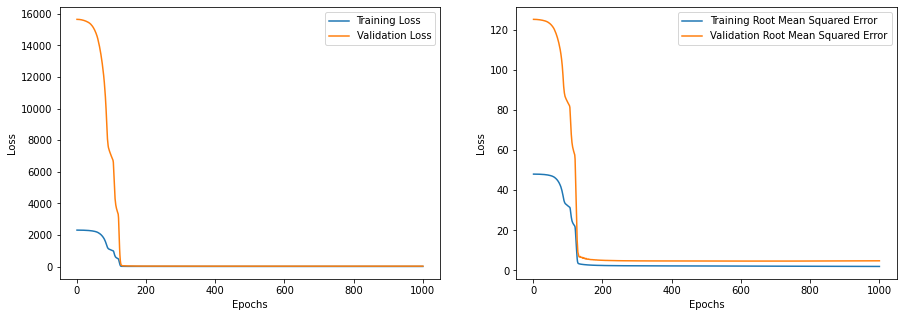

In [110]:
fig,(ax1,ax2)=plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(AAPL_epochs,AAPL_loss,label='Training Loss')
ax1.plot(AAPL_epochs,AAPL_val_loss,label='Validation Loss')
ax1.set(xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(AAPL_epochs,AAPL_root_mean_squared_error,label='Training Root Mean Squared Error')
ax2.plot(AAPL_epochs,AAPL_val_root_mean_squared_error,label='Validation Root Mean Squared Error')
ax2.set(xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

## Amazon

In [111]:
AMZN_Model=Model()

In [112]:
AMZN_Model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=tf.keras.metrics.RootMeanSquaredError())

In [113]:
AMZN_hist=AMZN_Model.fit(AMZN_Train_X,AMZN_Train_Y,epochs=200,validation_data=(AMZN_Test_X,AMZN_Test_Y),callbacks=[callback])

Epoch 1/200
9/9 [==============================] - 3s 94ms/step - loss: 2159387.5000 - root_mean_squared_error: 1469.4855 - val_loss: 10232792.0000 - val_root_mean_squared_error: 3198.8733
Epoch 2/200
9/9 [==============================] - 0s 26ms/step - loss: 2159358.0000 - root_mean_squared_error: 1469.4753 - val_loss: 10232451.0000 - val_root_mean_squared_error: 3198.8203
Epoch 3/200
9/9 [==============================] - 0s 28ms/step - loss: 2159267.2500 - root_mean_squared_error: 1469.4446 - val_loss: 10232216.0000 - val_root_mean_squared_error: 3198.7834
Epoch 4/200
9/9 [==============================] - 0s 27ms/step - loss: 2159085.5000 - root_mean_squared_error: 1469.3827 - val_loss: 10231461.0000 - val_root_mean_squared_error: 3198.6655
Epoch 5/200
9/9 [==============================] - 0s 25ms/step - loss: 2158872.0000 - root_mean_squared_error: 1469.3101 - val_loss: 10229568.0000 - val_root_mean_squared_error: 3198.3694
Epoch 6/200
9/9 [==============================] - 0s 2

9/9 [==============================] - 0s 36ms/step - loss: 1534853.6250 - root_mean_squared_error: 1238.8921 - val_loss: 7151104.0000 - val_root_mean_squared_error: 2674.1548
Epoch 88/200
9/9 [==============================] - 0s 32ms/step - loss: 1498720.6250 - root_mean_squared_error: 1224.2224 - val_loss: 6956950.5000 - val_root_mean_squared_error: 2637.6033
Epoch 89/200
9/9 [==============================] - 0s 27ms/step - loss: 1444034.2500 - root_mean_squared_error: 1201.6798 - val_loss: 6573094.0000 - val_root_mean_squared_error: 2563.8044
Epoch 90/200
9/9 [==============================] - 0s 43ms/step - loss: 1364018.0000 - root_mean_squared_error: 1167.9119 - val_loss: 6175051.5000 - val_root_mean_squared_error: 2484.9651
Epoch 91/200
9/9 [==============================] - 0s 24ms/step - loss: 1281238.1250 - root_mean_squared_error: 1131.9178 - val_loss: 5833239.0000 - val_root_mean_squared_error: 2415.2100
Epoch 92/200
9/9 [==============================] - 0s 44ms/step - l

Epoch 131/200
9/9 [==============================] - 0s 23ms/step - loss: 17138.4414 - root_mean_squared_error: 130.9139 - val_loss: 62033.4922 - val_root_mean_squared_error: 249.0652
Epoch 132/200
9/9 [==============================] - 0s 25ms/step - loss: 14774.6699 - root_mean_squared_error: 121.5511 - val_loss: 52323.7812 - val_root_mean_squared_error: 228.7439
Epoch 133/200
9/9 [==============================] - 0s 32ms/step - loss: 12820.2832 - root_mean_squared_error: 113.2267 - val_loss: 45279.4297 - val_root_mean_squared_error: 212.7896
Epoch 134/200
9/9 [==============================] - 0s 25ms/step - loss: 10987.2822 - root_mean_squared_error: 104.8202 - val_loss: 37556.6172 - val_root_mean_squared_error: 193.7953
Epoch 135/200
9/9 [==============================] - 0s 27ms/step - loss: 9306.9092 - root_mean_squared_error: 96.4723 - val_loss: 44639.9844 - val_root_mean_squared_error: 211.2818
Epoch 136/200
9/9 [==============================] - 0s 23ms/step - loss: 8297.967

9/9 [==============================] - 0s 43ms/step - loss: 3019.2629 - root_mean_squared_error: 54.9478 - val_loss: 21561.0996 - val_root_mean_squared_error: 146.8370
Epoch 177/200
9/9 [==============================] - 0s 25ms/step - loss: 2925.4597 - root_mean_squared_error: 54.0875 - val_loss: 17646.0762 - val_root_mean_squared_error: 132.8385
Epoch 178/200
9/9 [==============================] - 0s 28ms/step - loss: 2875.2085 - root_mean_squared_error: 53.6210 - val_loss: 19750.1816 - val_root_mean_squared_error: 140.5353
Epoch 179/200
9/9 [==============================] - 0s 29ms/step - loss: 2794.0054 - root_mean_squared_error: 52.8584 - val_loss: 20638.0020 - val_root_mean_squared_error: 143.6593
Epoch 180/200
9/9 [==============================] - 0s 24ms/step - loss: 2625.8081 - root_mean_squared_error: 51.2426 - val_loss: 17947.2246 - val_root_mean_squared_error: 133.9673
Epoch 181/200
9/9 [==============================] - 0s 23ms/step - loss: 2696.3403 - root_mean_squared_

In [114]:
AMZN_history_dict=AMZN_hist.history

AMZN_loss=AMZN_history_dict['loss']
AMZN_root_mean_squared_error=AMZN_history_dict['root_mean_squared_error']
AMZN_val_loss=AMZN_history_dict['val_loss']
AMZN_val_root_mean_squared_error=AMZN_history_dict['val_root_mean_squared_error']

AMZN_epochs=range(1,len(AMZN_loss)+1)

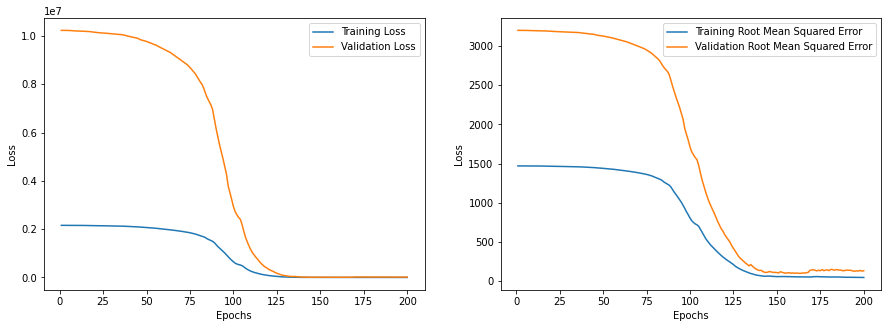

In [115]:
fig,(ax1,ax2)=plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(AMZN_epochs,AMZN_loss,label='Training Loss')
ax1.plot(AMZN_epochs,AMZN_val_loss,label='Validation Loss')
ax1.set(xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(AMZN_epochs,AMZN_root_mean_squared_error,label='Training Root Mean Squared Error')
ax2.plot(AMZN_epochs,AMZN_val_root_mean_squared_error,label='Validation Root Mean Squared Error')
ax2.set(xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

## Microsoft

In [116]:
MSFT_Model=Model()

In [117]:
MSFT_Model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=tf.keras.metrics.RootMeanSquaredError())

In [118]:
MSFT_hist=MSFT_Model.fit(MSFT_Train_X,MSFT_Train_Y,epochs=1000,validation_data=(MSFT_Test_X,MSFT_Test_Y),callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 2s 83ms/step - loss: 10543.6396 - root_mean_squared_error: 102.6822 - val_loss: 48491.5391 - val_root_mean_squared_error: 220.2079
Epoch 2/1000
9/9 [==============================] - 0s 23ms/step - loss: 10543.5000 - root_mean_squared_error: 102.6815 - val_loss: 48490.0117 - val_root_mean_squared_error: 220.2045
Epoch 3/1000
9/9 [==============================] - 0s 25ms/step - loss: 10543.0742 - root_mean_squared_error: 102.6795 - val_loss: 48486.8867 - val_root_mean_squared_error: 220.1974
Epoch 4/1000
9/9 [==============================] - 0s 24ms/step - loss: 10542.3398 - root_mean_squared_error: 102.6759 - val_loss: 48482.2734 - val_root_mean_squared_error: 220.1869
Epoch 5/1000
9/9 [==============================] - 0s 25ms/step - loss: 10541.3291 - root_mean_squared_error: 102.6710 - val_loss: 48476.1367 - val_root_mean_squared_error: 220.1730
Epoch 6/1000
9/9 [==============================] - 0s 25ms/step - loss: 10540.0244 -

9/9 [==============================] - 0s 25ms/step - loss: 3256.4541 - root_mean_squared_error: 57.0653 - val_loss: 14421.1729 - val_root_mean_squared_error: 120.0882
Epoch 91/1000
9/9 [==============================] - 0s 22ms/step - loss: 3145.5623 - root_mean_squared_error: 56.0853 - val_loss: 13996.2207 - val_root_mean_squared_error: 118.3056
Epoch 92/1000
9/9 [==============================] - 0s 22ms/step - loss: 3046.5784 - root_mean_squared_error: 55.1958 - val_loss: 13637.5654 - val_root_mean_squared_error: 116.7800
Epoch 93/1000
9/9 [==============================] - 0s 29ms/step - loss: 2963.7268 - root_mean_squared_error: 54.4401 - val_loss: 13315.5527 - val_root_mean_squared_error: 115.3930
Epoch 94/1000
9/9 [==============================] - 0s 24ms/step - loss: 2890.1135 - root_mean_squared_error: 53.7598 - val_loss: 12973.0850 - val_root_mean_squared_error: 113.8994
Epoch 95/1000
9/9 [==============================] - 0s 24ms/step - loss: 2812.9932 - root_mean_squared_

Epoch 136/1000
9/9 [==============================] - 0s 22ms/step - loss: 17.0350 - root_mean_squared_error: 4.1273 - val_loss: 54.5894 - val_root_mean_squared_error: 7.3885
Epoch 137/1000
9/9 [==============================] - 0s 22ms/step - loss: 16.7380 - root_mean_squared_error: 4.0912 - val_loss: 53.2056 - val_root_mean_squared_error: 7.2942
Epoch 138/1000
9/9 [==============================] - 0s 22ms/step - loss: 16.6538 - root_mean_squared_error: 4.0809 - val_loss: 52.8498 - val_root_mean_squared_error: 7.2698
Epoch 139/1000
9/9 [==============================] - 0s 21ms/step - loss: 16.5340 - root_mean_squared_error: 4.0662 - val_loss: 52.2953 - val_root_mean_squared_error: 7.2315
Epoch 140/1000
9/9 [==============================] - 0s 21ms/step - loss: 16.7144 - root_mean_squared_error: 4.0883 - val_loss: 53.5528 - val_root_mean_squared_error: 7.3180
Epoch 141/1000
9/9 [==============================] - 0s 21ms/step - loss: 16.5984 - root_mean_squared_error: 4.0741 - val_lo

Epoch 183/1000
9/9 [==============================] - 0s 23ms/step - loss: 13.5637 - root_mean_squared_error: 3.6829 - val_loss: 43.1109 - val_root_mean_squared_error: 6.5659
Epoch 184/1000
9/9 [==============================] - 0s 24ms/step - loss: 13.3828 - root_mean_squared_error: 3.6583 - val_loss: 46.7764 - val_root_mean_squared_error: 6.8393
Epoch 185/1000
9/9 [==============================] - 0s 23ms/step - loss: 13.2642 - root_mean_squared_error: 3.6420 - val_loss: 44.2085 - val_root_mean_squared_error: 6.6490
Epoch 186/1000
9/9 [==============================] - 0s 29ms/step - loss: 13.2124 - root_mean_squared_error: 3.6349 - val_loss: 43.2484 - val_root_mean_squared_error: 6.5764
Epoch 187/1000
9/9 [==============================] - 0s 33ms/step - loss: 13.1365 - root_mean_squared_error: 3.6244 - val_loss: 43.1857 - val_root_mean_squared_error: 6.5716
Epoch 188/1000
9/9 [==============================] - 0s 28ms/step - loss: 13.1295 - root_mean_squared_error: 3.6235 - val_lo

Epoch 230/1000
9/9 [==============================] - 0s 21ms/step - loss: 11.7922 - root_mean_squared_error: 3.4340 - val_loss: 42.2615 - val_root_mean_squared_error: 6.5009
Epoch 231/1000
9/9 [==============================] - 0s 21ms/step - loss: 11.7266 - root_mean_squared_error: 3.4244 - val_loss: 41.1237 - val_root_mean_squared_error: 6.4128
Epoch 232/1000
9/9 [==============================] - 0s 21ms/step - loss: 11.6663 - root_mean_squared_error: 3.4156 - val_loss: 42.0416 - val_root_mean_squared_error: 6.4840
Epoch 233/1000
9/9 [==============================] - 0s 22ms/step - loss: 11.6685 - root_mean_squared_error: 3.4159 - val_loss: 41.5932 - val_root_mean_squared_error: 6.4493
Epoch 234/1000
9/9 [==============================] - 0s 21ms/step - loss: 11.5982 - root_mean_squared_error: 3.4056 - val_loss: 41.6343 - val_root_mean_squared_error: 6.4525
Epoch 235/1000
9/9 [==============================] - 0s 21ms/step - loss: 11.5801 - root_mean_squared_error: 3.4030 - val_lo

Epoch 277/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.9564 - root_mean_squared_error: 3.3101 - val_loss: 41.1060 - val_root_mean_squared_error: 6.4114
Epoch 278/1000
9/9 [==============================] - 0s 29ms/step - loss: 10.9129 - root_mean_squared_error: 3.3035 - val_loss: 40.6801 - val_root_mean_squared_error: 6.3781
Epoch 279/1000
9/9 [==============================] - 0s 24ms/step - loss: 10.9101 - root_mean_squared_error: 3.3030 - val_loss: 41.1973 - val_root_mean_squared_error: 6.4185
Epoch 280/1000
9/9 [==============================] - 0s 20ms/step - loss: 10.8904 - root_mean_squared_error: 3.3001 - val_loss: 40.8133 - val_root_mean_squared_error: 6.3885
Epoch 281/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.8767 - root_mean_squared_error: 3.2980 - val_loss: 40.3933 - val_root_mean_squared_error: 6.3556
Epoch 282/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.8560 - root_mean_squared_error: 3.2948 - val_lo

Epoch 324/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.5131 - root_mean_squared_error: 3.2424 - val_loss: 40.7060 - val_root_mean_squared_error: 6.3801
Epoch 325/1000
9/9 [==============================] - 0s 24ms/step - loss: 10.4911 - root_mean_squared_error: 3.2390 - val_loss: 40.6384 - val_root_mean_squared_error: 6.3748
Epoch 326/1000
9/9 [==============================] - 0s 22ms/step - loss: 10.4973 - root_mean_squared_error: 3.2400 - val_loss: 40.4943 - val_root_mean_squared_error: 6.3635
Epoch 327/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.4888 - root_mean_squared_error: 3.2386 - val_loss: 40.9461 - val_root_mean_squared_error: 6.3989
Epoch 328/1000
9/9 [==============================] - 0s 24ms/step - loss: 10.4839 - root_mean_squared_error: 3.2379 - val_loss: 41.2030 - val_root_mean_squared_error: 6.4190
Epoch 329/1000
9/9 [==============================] - 0s 22ms/step - loss: 10.4819 - root_mean_squared_error: 3.2376 - val_lo

Epoch 417/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.1521 - root_mean_squared_error: 3.1862 - val_loss: 40.3527 - val_root_mean_squared_error: 6.3524
Epoch 418/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.1676 - root_mean_squared_error: 3.1887 - val_loss: 40.7508 - val_root_mean_squared_error: 6.3836
Epoch 419/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.1629 - root_mean_squared_error: 3.1879 - val_loss: 40.1385 - val_root_mean_squared_error: 6.3355
Epoch 420/1000
9/9 [==============================] - 0s 23ms/step - loss: 10.1571 - root_mean_squared_error: 3.1870 - val_loss: 40.7382 - val_root_mean_squared_error: 6.3827
Epoch 421/1000
9/9 [==============================] - 0s 22ms/step - loss: 10.1451 - root_mean_squared_error: 3.1851 - val_loss: 40.4941 - val_root_mean_squared_error: 6.3635
Epoch 422/1000
9/9 [==============================] - 0s 23ms/step - loss: 10.1407 - root_mean_squared_error: 3.1844 - val_lo

Epoch 464/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.0044 - root_mean_squared_error: 3.1630 - val_loss: 40.0524 - val_root_mean_squared_error: 6.3287
Epoch 465/1000
9/9 [==============================] - 0s 21ms/step - loss: 10.0210 - root_mean_squared_error: 3.1656 - val_loss: 40.6933 - val_root_mean_squared_error: 6.3791
Epoch 466/1000
9/9 [==============================] - 0s 22ms/step - loss: 10.0180 - root_mean_squared_error: 3.1651 - val_loss: 40.1348 - val_root_mean_squared_error: 6.3352
Epoch 467/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.9972 - root_mean_squared_error: 3.1618 - val_loss: 39.9675 - val_root_mean_squared_error: 6.3220
Epoch 468/1000
9/9 [==============================] - 0s 22ms/step - loss: 10.0150 - root_mean_squared_error: 3.1646 - val_loss: 40.7368 - val_root_mean_squared_error: 6.3825
Epoch 469/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.9926 - root_mean_squared_error: 3.1611 - val_loss

Epoch 511/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.8580 - root_mean_squared_error: 3.1397 - val_loss: 40.0397 - val_root_mean_squared_error: 6.3277
Epoch 512/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.8362 - root_mean_squared_error: 3.1363 - val_loss: 39.9918 - val_root_mean_squared_error: 6.3239
Epoch 513/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.8397 - root_mean_squared_error: 3.1368 - val_loss: 40.2782 - val_root_mean_squared_error: 6.3465
Epoch 514/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.8414 - root_mean_squared_error: 3.1371 - val_loss: 40.5359 - val_root_mean_squared_error: 6.3668
Epoch 515/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.8544 - root_mean_squared_error: 3.1392 - val_loss: 39.8235 - val_root_mean_squared_error: 6.3106
Epoch 516/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.8390 - root_mean_squared_error: 3.1367 - val_loss: 40

9/9 [==============================] - 0s 20ms/step - loss: 9.6762 - root_mean_squared_error: 3.1107 - val_loss: 39.8095 - val_root_mean_squared_error: 6.3095
Epoch 559/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.6715 - root_mean_squared_error: 3.1099 - val_loss: 39.5980 - val_root_mean_squared_error: 6.2927
Epoch 560/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.6745 - root_mean_squared_error: 3.1104 - val_loss: 39.6653 - val_root_mean_squared_error: 6.2980
Epoch 561/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.6695 - root_mean_squared_error: 3.1096 - val_loss: 39.6854 - val_root_mean_squared_error: 6.2996
Epoch 562/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.6816 - root_mean_squared_error: 3.1115 - val_loss: 39.3903 - val_root_mean_squared_error: 6.2762
Epoch 563/1000
9/9 [==============================] - 0s 25ms/step - loss: 9.6678 - root_mean_squared_error: 3.1093 - val_loss: 39.8926 - val_roo

9/9 [==============================] - 0s 21ms/step - loss: 9.4291 - root_mean_squared_error: 3.0707 - val_loss: 38.7023 - val_root_mean_squared_error: 6.2211
Epoch 653/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.4666 - root_mean_squared_error: 3.0768 - val_loss: 37.9996 - val_root_mean_squared_error: 6.1644
Epoch 654/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.4444 - root_mean_squared_error: 3.0732 - val_loss: 38.6364 - val_root_mean_squared_error: 6.2158
Epoch 655/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.4191 - root_mean_squared_error: 3.0691 - val_loss: 38.6593 - val_root_mean_squared_error: 6.2177
Epoch 656/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.4247 - root_mean_squared_error: 3.0700 - val_loss: 38.7539 - val_root_mean_squared_error: 6.2253
Epoch 657/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.4216 - root_mean_squared_error: 3.0695 - val_loss: 38.8085 - val_roo

Epoch 746/1000
9/9 [==============================] - 0s 24ms/step - loss: 9.2105 - root_mean_squared_error: 3.0349 - val_loss: 37.7261 - val_root_mean_squared_error: 6.1422
Epoch 747/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.2079 - root_mean_squared_error: 3.0345 - val_loss: 38.1490 - val_root_mean_squared_error: 6.1765
Epoch 748/1000
9/9 [==============================] - 0s 23ms/step - loss: 9.2165 - root_mean_squared_error: 3.0359 - val_loss: 38.3852 - val_root_mean_squared_error: 6.1956
Epoch 749/1000
9/9 [==============================] - 0s 22ms/step - loss: 9.2009 - root_mean_squared_error: 3.0333 - val_loss: 37.8817 - val_root_mean_squared_error: 6.1548
Epoch 750/1000
9/9 [==============================] - 0s 23ms/step - loss: 9.2344 - root_mean_squared_error: 3.0388 - val_loss: 37.7741 - val_root_mean_squared_error: 6.1461
Epoch 751/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.2029 - root_mean_squared_error: 3.0336 - val_loss: 37

9/9 [==============================] - 0s 21ms/step - loss: 9.1089 - root_mean_squared_error: 3.0181 - val_loss: 37.6230 - val_root_mean_squared_error: 6.1338
Epoch 794/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.0977 - root_mean_squared_error: 3.0162 - val_loss: 37.8082 - val_root_mean_squared_error: 6.1488
Epoch 795/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.1055 - root_mean_squared_error: 3.0175 - val_loss: 38.0941 - val_root_mean_squared_error: 6.1720
Epoch 796/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.1231 - root_mean_squared_error: 3.0205 - val_loss: 37.8839 - val_root_mean_squared_error: 6.1550
Epoch 797/1000
9/9 [==============================] - 0s 23ms/step - loss: 9.0932 - root_mean_squared_error: 3.0155 - val_loss: 37.4539 - val_root_mean_squared_error: 6.1200
Epoch 798/1000
9/9 [==============================] - 0s 21ms/step - loss: 9.0984 - root_mean_squared_error: 3.0164 - val_loss: 37.5454 - val_roo

9/9 [==============================] - 0s 22ms/step - loss: 8.9426 - root_mean_squared_error: 2.9904 - val_loss: 36.8172 - val_root_mean_squared_error: 6.0677
Epoch 888/1000
9/9 [==============================] - 0s 21ms/step - loss: 8.9003 - root_mean_squared_error: 2.9833 - val_loss: 36.9355 - val_root_mean_squared_error: 6.0775
Epoch 889/1000
9/9 [==============================] - 0s 22ms/step - loss: 8.9023 - root_mean_squared_error: 2.9837 - val_loss: 37.1918 - val_root_mean_squared_error: 6.0985
Epoch 890/1000
9/9 [==============================] - 0s 22ms/step - loss: 8.9152 - root_mean_squared_error: 2.9858 - val_loss: 37.2951 - val_root_mean_squared_error: 6.1070
Epoch 891/1000
9/9 [==============================] - 0s 23ms/step - loss: 8.9601 - root_mean_squared_error: 2.9933 - val_loss: 36.7846 - val_root_mean_squared_error: 6.0650
Epoch 892/1000
9/9 [==============================] - 0s 22ms/step - loss: 8.9160 - root_mean_squared_error: 2.9860 - val_loss: 36.7180 - val_roo

9/9 [==============================] - 0s 22ms/step - loss: 8.7228 - root_mean_squared_error: 2.9534 - val_loss: 36.4195 - val_root_mean_squared_error: 6.0349
Epoch 982/1000
9/9 [==============================] - 0s 27ms/step - loss: 8.7291 - root_mean_squared_error: 2.9545 - val_loss: 36.4905 - val_root_mean_squared_error: 6.0407
Epoch 983/1000
9/9 [==============================] - 0s 22ms/step - loss: 8.7161 - root_mean_squared_error: 2.9523 - val_loss: 36.2096 - val_root_mean_squared_error: 6.0174
Epoch 984/1000
9/9 [==============================] - 0s 22ms/step - loss: 8.7389 - root_mean_squared_error: 2.9562 - val_loss: 36.3342 - val_root_mean_squared_error: 6.0278
Epoch 985/1000
9/9 [==============================] - 0s 23ms/step - loss: 8.7248 - root_mean_squared_error: 2.9538 - val_loss: 36.1156 - val_root_mean_squared_error: 6.0096
Epoch 986/1000
9/9 [==============================] - 0s 31ms/step - loss: 8.7439 - root_mean_squared_error: 2.9570 - val_loss: 36.5234 - val_roo

In [119]:
MSFT_history_dict=MSFT_hist.history

MSFT_loss=MSFT_history_dict['loss']
MSFT_root_mean_squared_error=MSFT_history_dict['root_mean_squared_error']
MSFT_val_loss=MSFT_history_dict['val_loss']
MSFT_val_root_mean_squared_error=MSFT_history_dict['val_root_mean_squared_error']

MSFT_epochs=range(1,len(MSFT_loss)+1)

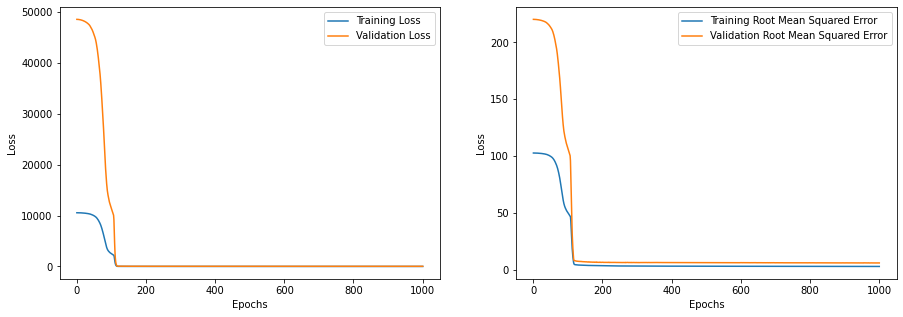

In [120]:
fig,(ax1,ax2)=plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(MSFT_epochs,MSFT_loss,label='Training Loss')
ax1.plot(MSFT_epochs,MSFT_val_loss,label='Validation Loss')
ax1.set(xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(MSFT_epochs,MSFT_root_mean_squared_error,label='Training Root Mean Squared Error')
ax2.plot(MSFT_epochs,MSFT_val_root_mean_squared_error,label='Validation Root Mean Squared Error')
ax2.set(xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

# GOOGle

In [121]:
GOOG_Model=Model()

In [122]:
GOOG_Model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=tf.keras.metrics.RootMeanSquaredError())

In [123]:
GOOG_hist=GOOG_Model.fit(GOOG_Train_X,GOOG_Train_Y,epochs=1000,validation_data=(GOOG_Test_X,GOOG_Test_Y),callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 4s 106ms/step - loss: 1009447.3125 - root_mean_squared_error: 1004.7126 - val_loss: 3160956.2500 - val_root_mean_squared_error: 1777.9077
Epoch 2/1000
9/9 [==============================] - 0s 47ms/step - loss: 1009409.2500 - root_mean_squared_error: 1004.6935 - val_loss: 3160641.2500 - val_root_mean_squared_error: 1777.8192
Epoch 3/1000
9/9 [==============================] - 0s 35ms/step - loss: 1009271.4375 - root_mean_squared_error: 1004.6250 - val_loss: 3160001.7500 - val_root_mean_squared_error: 1777.6394
Epoch 4/1000
9/9 [==============================] - 0s 31ms/step - loss: 1009042.8750 - root_mean_squared_error: 1004.5113 - val_loss: 3158922.5000 - val_root_mean_squared_error: 1777.3357
Epoch 5/1000
9/9 [==============================] - 0s 36ms/step - loss: 1008685.5625 - root_mean_squared_error: 1004.3334 - val_loss: 3157478.7500 - val_root_mean_squared_error: 1776.9296
Epoch 6/1000
9/9 [==============================] - 0s

Epoch 88/1000
9/9 [==============================] - 0s 26ms/step - loss: 666061.6875 - root_mean_squared_error: 816.1260 - val_loss: 2066754.1250 - val_root_mean_squared_error: 1437.6211
Epoch 89/1000
9/9 [==============================] - 0s 24ms/step - loss: 649774.3750 - root_mean_squared_error: 806.0858 - val_loss: 2013108.2500 - val_root_mean_squared_error: 1418.8405
Epoch 90/1000
9/9 [==============================] - 0s 30ms/step - loss: 630799.7500 - root_mean_squared_error: 794.2290 - val_loss: 1948973.8750 - val_root_mean_squared_error: 1396.0565
Epoch 91/1000
9/9 [==============================] - 0s 29ms/step - loss: 612028.1875 - root_mean_squared_error: 782.3223 - val_loss: 1888918.3750 - val_root_mean_squared_error: 1374.3793
Epoch 92/1000
9/9 [==============================] - 0s 35ms/step - loss: 592440.6875 - root_mean_squared_error: 769.7017 - val_loss: 1821926.7500 - val_root_mean_squared_error: 1349.7877
Epoch 93/1000
9/9 [==============================] - 0s 26ms

9/9 [==============================] - 0s 52ms/step - loss: 743.4756 - root_mean_squared_error: 27.2667 - val_loss: 5092.1235 - val_root_mean_squared_error: 71.3591
Epoch 178/1000
9/9 [==============================] - ETA: 0s - loss: 736.8586 - root_mean_squared_error: 27.14 - 1s 83ms/step - loss: 736.8586 - root_mean_squared_error: 27.1451 - val_loss: 5440.1890 - val_root_mean_squared_error: 73.7576
Epoch 179/1000
9/9 [==============================] - 1s 93ms/step - loss: 739.2065 - root_mean_squared_error: 27.1884 - val_loss: 5273.1704 - val_root_mean_squared_error: 72.6166
Epoch 180/1000
9/9 [==============================] - 0s 54ms/step - loss: 734.3599 - root_mean_squared_error: 27.0991 - val_loss: 5327.4053 - val_root_mean_squared_error: 72.9891
Epoch 181/1000
9/9 [==============================] - 0s 39ms/step - loss: 734.2216 - root_mean_squared_error: 27.0965 - val_loss: 5261.9385 - val_root_mean_squared_error: 72.5392
Epoch 182/1000
9/9 [==============================] - 0

9/9 [==============================] - 0s 28ms/step - loss: 675.2206 - root_mean_squared_error: 25.9850 - val_loss: 5448.5640 - val_root_mean_squared_error: 73.8144
Epoch 268/1000
9/9 [==============================] - 0s 29ms/step - loss: 674.1148 - root_mean_squared_error: 25.9637 - val_loss: 5285.9409 - val_root_mean_squared_error: 72.7045
Epoch 269/1000
9/9 [==============================] - 0s 38ms/step - loss: 673.4749 - root_mean_squared_error: 25.9514 - val_loss: 5371.7666 - val_root_mean_squared_error: 73.2923
Epoch 270/1000
9/9 [==============================] - 1s 64ms/step - loss: 675.1137 - root_mean_squared_error: 25.9829 - val_loss: 5347.1343 - val_root_mean_squared_error: 73.1241
Epoch 271/1000
9/9 [==============================] - 0s 28ms/step - loss: 677.2817 - root_mean_squared_error: 26.0246 - val_loss: 5358.2778 - val_root_mean_squared_error: 73.2003
Epoch 272/1000
9/9 [==============================] - 0s 35ms/step - loss: 672.1538 - root_mean_squared_error: 25.9

9/9 [==============================] - 0s 24ms/step - loss: 655.1446 - root_mean_squared_error: 25.5958 - val_loss: 5325.2461 - val_root_mean_squared_error: 72.9743
Epoch 358/1000
9/9 [==============================] - 0s 26ms/step - loss: 654.9176 - root_mean_squared_error: 25.5914 - val_loss: 5351.3950 - val_root_mean_squared_error: 73.1532
Epoch 359/1000
9/9 [==============================] - 0s 27ms/step - loss: 656.2272 - root_mean_squared_error: 25.6169 - val_loss: 5271.5693 - val_root_mean_squared_error: 72.6056
Epoch 360/1000
9/9 [==============================] - 0s 24ms/step - loss: 655.2447 - root_mean_squared_error: 25.5977 - val_loss: 5329.5532 - val_root_mean_squared_error: 73.0038
Epoch 361/1000
9/9 [==============================] - 0s 33ms/step - loss: 655.5807 - root_mean_squared_error: 25.6043 - val_loss: 5288.4336 - val_root_mean_squared_error: 72.7216
Epoch 362/1000
9/9 [==============================] - 0s 30ms/step - loss: 654.4784 - root_mean_squared_error: 25.5

9/9 [==============================] - 0s 25ms/step - loss: 647.0888 - root_mean_squared_error: 25.4379 - val_loss: 5218.3789 - val_root_mean_squared_error: 72.2383
Epoch 448/1000
9/9 [==============================] - 0s 23ms/step - loss: 646.8781 - root_mean_squared_error: 25.4338 - val_loss: 5244.0977 - val_root_mean_squared_error: 72.4161
Epoch 449/1000
9/9 [==============================] - 0s 24ms/step - loss: 646.3737 - root_mean_squared_error: 25.4239 - val_loss: 5183.2500 - val_root_mean_squared_error: 71.9948
Epoch 450/1000
9/9 [==============================] - 0s 23ms/step - loss: 646.3171 - root_mean_squared_error: 25.4228 - val_loss: 5217.6104 - val_root_mean_squared_error: 72.2330
Epoch 451/1000
9/9 [==============================] - 0s 22ms/step - loss: 646.6837 - root_mean_squared_error: 25.4300 - val_loss: 5268.0352 - val_root_mean_squared_error: 72.5812
Epoch 452/1000
9/9 [==============================] - 0s 23ms/step - loss: 649.4774 - root_mean_squared_error: 25.4

9/9 [==============================] - 0s 22ms/step - loss: 638.0557 - root_mean_squared_error: 25.2598 - val_loss: 5325.2754 - val_root_mean_squared_error: 72.9745
Epoch 538/1000
9/9 [==============================] - 0s 22ms/step - loss: 639.4582 - root_mean_squared_error: 25.2875 - val_loss: 5296.1021 - val_root_mean_squared_error: 72.7743
Epoch 539/1000
9/9 [==============================] - 0s 22ms/step - loss: 637.7736 - root_mean_squared_error: 25.2542 - val_loss: 5328.6235 - val_root_mean_squared_error: 72.9974
Epoch 540/1000
9/9 [==============================] - 0s 22ms/step - loss: 638.5161 - root_mean_squared_error: 25.2689 - val_loss: 5365.8179 - val_root_mean_squared_error: 73.2517
Epoch 541/1000
9/9 [==============================] - 0s 22ms/step - loss: 638.3731 - root_mean_squared_error: 25.2660 - val_loss: 5331.1108 - val_root_mean_squared_error: 73.0145
Epoch 542/1000
9/9 [==============================] - 0s 22ms/step - loss: 638.2059 - root_mean_squared_error: 25.2

9/9 [==============================] - 0s 33ms/step - loss: 629.9808 - root_mean_squared_error: 25.0994 - val_loss: 5437.2764 - val_root_mean_squared_error: 73.7379
Epoch 628/1000
9/9 [==============================] - 0s 24ms/step - loss: 629.8519 - root_mean_squared_error: 25.0969 - val_loss: 5442.7031 - val_root_mean_squared_error: 73.7747
Epoch 629/1000
9/9 [==============================] - 0s 27ms/step - loss: 629.9586 - root_mean_squared_error: 25.0990 - val_loss: 5463.3564 - val_root_mean_squared_error: 73.9145
Epoch 630/1000
9/9 [==============================] - 0s 31ms/step - loss: 630.2705 - root_mean_squared_error: 25.1052 - val_loss: 5307.8486 - val_root_mean_squared_error: 72.8550
Epoch 631/1000
9/9 [==============================] - ETA: 0s - loss: 630.4361 - root_mean_squared_error: 25.10 - 0s 41ms/step - loss: 630.4361 - root_mean_squared_error: 25.1085 - val_loss: 5434.2437 - val_root_mean_squared_error: 73.7173
Epoch 632/1000
9/9 [==============================] - 0

9/9 [==============================] - 0s 25ms/step - loss: 621.8223 - root_mean_squared_error: 24.9364 - val_loss: 5446.5840 - val_root_mean_squared_error: 73.8010
Epoch 718/1000
9/9 [==============================] - 0s 27ms/step - loss: 622.8959 - root_mean_squared_error: 24.9579 - val_loss: 5537.5420 - val_root_mean_squared_error: 74.4147
Epoch 719/1000
9/9 [==============================] - 0s 29ms/step - loss: 621.5413 - root_mean_squared_error: 24.9307 - val_loss: 5484.6406 - val_root_mean_squared_error: 74.0584
Epoch 720/1000
9/9 [==============================] - 0s 25ms/step - loss: 622.3015 - root_mean_squared_error: 24.9460 - val_loss: 5477.2622 - val_root_mean_squared_error: 74.0085
Epoch 721/1000
9/9 [==============================] - 0s 27ms/step - loss: 620.5865 - root_mean_squared_error: 24.9116 - val_loss: 5406.3462 - val_root_mean_squared_error: 73.5279
Epoch 722/1000
9/9 [==============================] - 1s 59ms/step - loss: 622.9703 - root_mean_squared_error: 24.9

9/9 [==============================] - 0s 31ms/step - loss: 612.8367 - root_mean_squared_error: 24.7555 - val_loss: 5422.4785 - val_root_mean_squared_error: 73.6375
Epoch 808/1000
9/9 [==============================] - 0s 29ms/step - loss: 612.9105 - root_mean_squared_error: 24.7570 - val_loss: 5531.2607 - val_root_mean_squared_error: 74.3724
Epoch 809/1000
9/9 [==============================] - 0s 26ms/step - loss: 612.6616 - root_mean_squared_error: 24.7520 - val_loss: 5437.5063 - val_root_mean_squared_error: 73.7394
Epoch 810/1000
9/9 [==============================] - 1s 72ms/step - loss: 612.2975 - root_mean_squared_error: 24.7446 - val_loss: 5508.3032 - val_root_mean_squared_error: 74.2179
Epoch 811/1000
9/9 [==============================] - 1s 117ms/step - loss: 611.9457 - root_mean_squared_error: 24.7375 - val_loss: 5454.7617 - val_root_mean_squared_error: 73.8564
Epoch 812/1000
9/9 [==============================] - 1s 49ms/step - loss: 611.8088 - root_mean_squared_error: 24.

9/9 [==============================] - 0s 30ms/step - loss: 606.9622 - root_mean_squared_error: 24.6366 - val_loss: 5448.2871 - val_root_mean_squared_error: 73.8125
Epoch 898/1000
9/9 [==============================] - 0s 32ms/step - loss: 610.4605 - root_mean_squared_error: 24.7075 - val_loss: 5162.4097 - val_root_mean_squared_error: 71.8499
Epoch 899/1000
9/9 [==============================] - 0s 55ms/step - loss: 605.8586 - root_mean_squared_error: 24.6142 - val_loss: 5467.6138 - val_root_mean_squared_error: 73.9433
Epoch 900/1000
9/9 [==============================] - 1s 103ms/step - loss: 604.7620 - root_mean_squared_error: 24.5919 - val_loss: 5353.7183 - val_root_mean_squared_error: 73.1691
Epoch 901/1000
9/9 [==============================] - 1s 129ms/step - loss: 603.8282 - root_mean_squared_error: 24.5729 - val_loss: 5322.9941 - val_root_mean_squared_error: 72.9589
Epoch 902/1000
9/9 [==============================] - 0s 43ms/step - loss: 603.8704 - root_mean_squared_error: 24

9/9 [==============================] - 0s 30ms/step - loss: 596.3091 - root_mean_squared_error: 24.4194 - val_loss: 5473.6348 - val_root_mean_squared_error: 73.9840
Epoch 988/1000
9/9 [==============================] - 0s 28ms/step - loss: 596.5632 - root_mean_squared_error: 24.4246 - val_loss: 5417.2163 - val_root_mean_squared_error: 73.6017
Epoch 989/1000
9/9 [==============================] - 0s 27ms/step - loss: 597.5944 - root_mean_squared_error: 24.4457 - val_loss: 5204.2070 - val_root_mean_squared_error: 72.1402
Epoch 990/1000
9/9 [==============================] - 0s 55ms/step - loss: 594.8870 - root_mean_squared_error: 24.3903 - val_loss: 5254.0732 - val_root_mean_squared_error: 72.4850
Epoch 991/1000
9/9 [==============================] - 0s 24ms/step - loss: 594.7839 - root_mean_squared_error: 24.3882 - val_loss: 5384.1616 - val_root_mean_squared_error: 73.3768
Epoch 992/1000
9/9 [==============================] - 0s 53ms/step - loss: 594.9012 - root_mean_squared_error: 24.3

In [124]:
GOOG_history_dict=GOOG_hist.history

GOOG_loss=GOOG_history_dict['loss']
GOOG_root_mean_squared_error=GOOG_history_dict['root_mean_squared_error']
GOOG_val_loss=GOOG_history_dict['val_loss']
GOOG_val_root_mean_squared_error=GOOG_history_dict['val_root_mean_squared_error']

GOOG_epochs=range(1,len(GOOG_loss)+1)

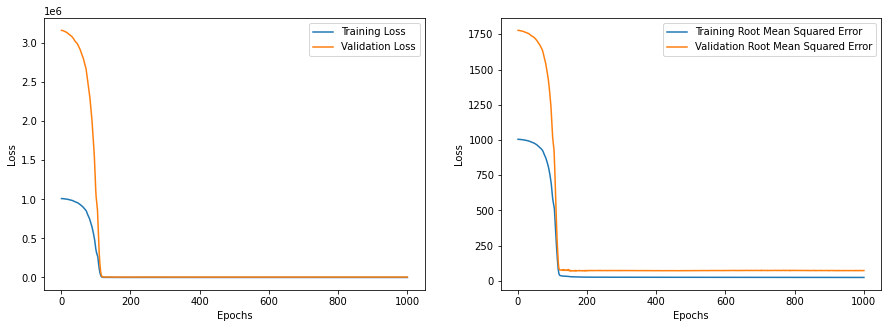

In [125]:
fig,(ax1,ax2)=plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(GOOG_epochs,GOOG_loss,label='Training Loss')
ax1.plot(GOOG_epochs,GOOG_val_loss,label='Validation Loss')
ax1.set(xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(GOOG_epochs,GOOG_root_mean_squared_error,label='Training Root Mean Squared Error')
ax2.plot(GOOG_epochs,GOOG_val_root_mean_squared_error,label='Validation Root Mean Squared Error')
ax2.set(xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

## TeSLA

In [126]:
TSLA_Model=Model()

In [127]:
TSLA_Model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=tf.keras.metrics.RootMeanSquaredError())

In [128]:
TSLA_hist=TSLA_Model.fit(TSLA_Train_X,TSLA_Train_Y,epochs=200,validation_data=(TSLA_Test_X,TSLA_Test_Y),callbacks=[callback])

Epoch 1/200
9/9 [==============================] - 4s 159ms/step - loss: 9989.0098 - root_mean_squared_error: 99.9450 - val_loss: 427368.8438 - val_root_mean_squared_error: 653.7346
Epoch 2/200
9/9 [==============================] - 0s 20ms/step - loss: 9988.8613 - root_mean_squared_error: 99.9443 - val_loss: 427354.6875 - val_root_mean_squared_error: 653.7237
Epoch 3/200
9/9 [==============================] - 0s 26ms/step - loss: 9988.4561 - root_mean_squared_error: 99.9423 - val_loss: 427327.2500 - val_root_mean_squared_error: 653.7028
Epoch 4/200
9/9 [==============================] - 0s 28ms/step - loss: 9987.7695 - root_mean_squared_error: 99.9388 - val_loss: 427282.7188 - val_root_mean_squared_error: 653.6687
Epoch 5/200
9/9 [==============================] - 0s 34ms/step - loss: 9986.6865 - root_mean_squared_error: 99.9334 - val_loss: 427227.7500 - val_root_mean_squared_error: 653.6266
Epoch 6/200
9/9 [==============================] - 0s 31ms/step - loss: 9985.4521 - root_mean_

9/9 [==============================] - 0s 34ms/step - loss: 9557.7236 - root_mean_squared_error: 97.7636 - val_loss: 404039.9062 - val_root_mean_squared_error: 635.6414
Epoch 47/200
9/9 [==============================] - ETA: 0s - loss: 8732.5781 - root_mean_squared_error: 93.4483 - 0s 34ms/step - loss: 9529.7119 - root_mean_squared_error: 97.6202 - val_loss: 402849.4062 - val_root_mean_squared_error: 634.7042
Epoch 48/200
9/9 [==============================] - 0s 34ms/step - loss: 9501.8711 - root_mean_squared_error: 97.4775 - val_loss: 401551.3125 - val_root_mean_squared_error: 633.6807
Epoch 49/200
9/9 [==============================] - ETA: 0s - loss: 8988.9805 - root_mean_squared_error: 94.810 - ETA: 0s - loss: 9473.3066 - root_mean_squared_error: 97.330 - 0s 40ms/step - loss: 9473.3066 - root_mean_squared_error: 97.3309 - val_loss: 400140.0625 - val_root_mean_squared_error: 632.5663
Epoch 50/200
9/9 [==============================] - 0s 34ms/step - loss: 9441.3984 - root_mean_squ

Epoch 90/200
9/9 [==============================] - 0s 28ms/step - loss: 2977.2366 - root_mean_squared_error: 54.5641 - val_loss: 111640.3281 - val_root_mean_squared_error: 334.1262
Epoch 91/200
9/9 [==============================] - 0s 37ms/step - loss: 2762.8198 - root_mean_squared_error: 52.5625 - val_loss: 105600.3359 - val_root_mean_squared_error: 324.9621
Epoch 92/200
9/9 [==============================] - 0s 25ms/step - loss: 2610.3235 - root_mean_squared_error: 51.0913 - val_loss: 100952.3750 - val_root_mean_squared_error: 317.7300
Epoch 93/200
9/9 [==============================] - 0s 27ms/step - loss: 2516.5779 - root_mean_squared_error: 50.1655 - val_loss: 97762.2266 - val_root_mean_squared_error: 312.6695
Epoch 94/200
9/9 [==============================] - 0s 23ms/step - loss: 2437.6187 - root_mean_squared_error: 49.3722 - val_loss: 95803.9453 - val_root_mean_squared_error: 309.5222
Epoch 95/200
9/9 [==============================] - 0s 21ms/step - loss: 2370.3420 - root_me

9/9 [==============================] - 0s 27ms/step - loss: 59.4237 - root_mean_squared_error: 7.7087 - val_loss: 6268.8252 - val_root_mean_squared_error: 79.1759
Epoch 182/200
9/9 [==============================] - 0s 31ms/step - loss: 58.6571 - root_mean_squared_error: 7.6588 - val_loss: 6277.7866 - val_root_mean_squared_error: 79.2325
Epoch 183/200
9/9 [==============================] - 1s 69ms/step - loss: 58.0809 - root_mean_squared_error: 7.6211 - val_loss: 6353.2427 - val_root_mean_squared_error: 79.7072
Epoch 184/200
9/9 [==============================] - 1s 84ms/step - loss: 57.4871 - root_mean_squared_error: 7.5820 - val_loss: 7136.7993 - val_root_mean_squared_error: 84.4796
Epoch 185/200
9/9 [==============================] - 0s 34ms/step - loss: 57.2138 - root_mean_squared_error: 7.5640 - val_loss: 7146.8364 - val_root_mean_squared_error: 84.5390
Epoch 186/200
9/9 [==============================] - 0s 25ms/step - loss: 56.7183 - root_mean_squared_error: 7.5312 - val_loss: 7

In [129]:
TSLA_history_dict=TSLA_hist.history

TSLA_loss=TSLA_history_dict['loss']
TSLA_root_mean_squared_error=TSLA_history_dict['root_mean_squared_error']
TSLA_val_loss=TSLA_history_dict['val_loss']
TSLA_val_root_mean_squared_error=TSLA_history_dict['val_root_mean_squared_error']

TSLA_epochs=range(1,len(TSLA_loss)+1)

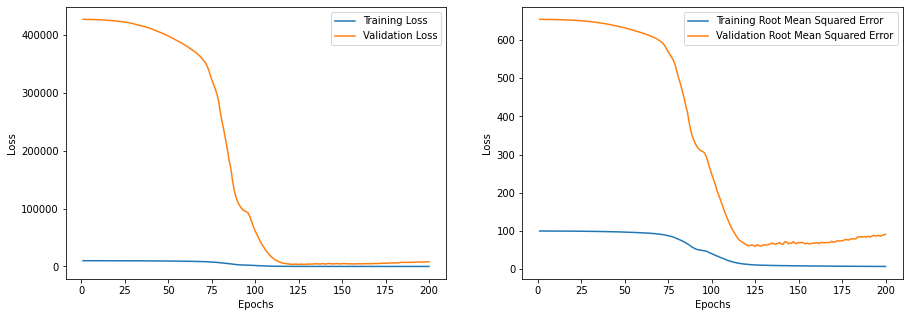

In [130]:
fig,(ax1,ax2)=plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(TSLA_epochs,TSLA_loss,label='Training Loss')
ax1.plot(TSLA_epochs,TSLA_val_loss,label='Validation Loss')
ax1.set(xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(TSLA_epochs,TSLA_root_mean_squared_error,label='Training Root Mean Squared Error')
ax2.plot(TSLA_epochs,TSLA_val_root_mean_squared_error,label='Validation Root Mean Squared Error')
ax2.set(xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

## Predictiong the Closing stock price

In [131]:
AAPL_Prediction=AAPL_Model.predict(AAPL_Test_X)

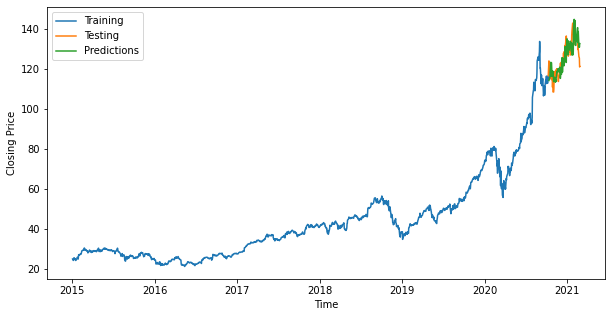

In [132]:
plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_AAPL['Date'][Pre_Processed_AAPL['Date']<'2020-10-12'],
         Pre_Processed_AAPL['Adj. Close'][Pre_Processed_AAPL['Date']<'2020-10-12'],
         label='Training')

plt.plot(Pre_Processed_AAPL['Date'][Pre_Processed_AAPL['Date']>='2020-10-09'],
         Pre_Processed_AAPL['Adj. Close'][Pre_Processed_AAPL['Date']>='2020-10-09'],
         label='Testing')

plt.plot(Pre_Processed_AAPL['Date'][Pre_Processed_AAPL['Date']>='2020-10-12'],
         AAPL_Prediction.reshape(-1),
         label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [133]:
AAPL_rmse=math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1,5),AAPL_Prediction))
AAPL_mape=np.mean(np.abs(AAPL_Prediction-AAPL_Test_Y.reshape(-1,5))/np.abs(AAPL_Test_Y.reshape(-1,5)))

print(f'RMSE: {AAPL_rmse}')
print(f'RMSE: {AAPL_mape}')

RMSE: 4.821147848160953
RMSE: 0.02975742682214184


In [134]:
AMZN_Prediction=AMZN_Model.predict(AMZN_Test_X)

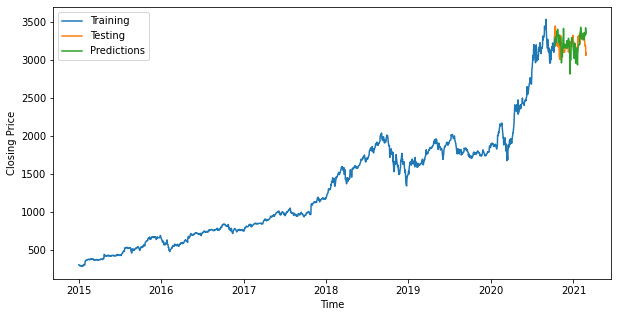

In [135]:
plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_AMZN['Date'][Pre_Processed_AMZN['Date']<'2020-10-12'],
         Pre_Processed_AMZN['Adj. Close'][Pre_Processed_AMZN['Date']<'2020-10-12'],
         label='Training')

plt.plot(Pre_Processed_AMZN['Date'][Pre_Processed_AMZN['Date']>='2020-10-09'],
         Pre_Processed_AMZN['Adj. Close'][Pre_Processed_AMZN['Date']>='2020-10-09'],
         label='Testing')

plt.plot(Pre_Processed_AMZN['Date'][Pre_Processed_AMZN['Date']>='2020-10-12'],
         AMZN_Prediction.reshape(-1),
         label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [136]:
AMZN_rmse=math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1,5),AMZN_Prediction))
AMZN_mape=np.mean(np.abs(AMZN_Prediction-AMZN_Test_Y.reshape(-1,5))/np.abs(AMZN_Test_Y.reshape(-1,5)))

print(f'RMSE: {AMZN_rmse}')
print(f'RMSE: {AMZN_mape}')

RMSE: 132.59238131630303
RMSE: 0.03174820017743291


In [137]:
GOOG_Prediction=GOOG_Model.predict(GOOG_Test_X)

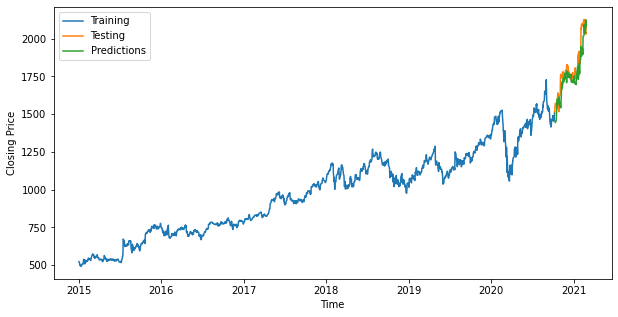

In [138]:
plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_GOOG['Date'][Pre_Processed_GOOG['Date']<'2020-10-12'],
         Pre_Processed_GOOG['Adj. Close'][Pre_Processed_GOOG['Date']<'2020-10-12'],
         label='Training')

plt.plot(Pre_Processed_GOOG['Date'][Pre_Processed_GOOG['Date']>='2020-10-09'],
         Pre_Processed_GOOG['Adj. Close'][Pre_Processed_GOOG['Date']>='2020-10-09'],
         label='Testing')

plt.plot(Pre_Processed_GOOG['Date'][Pre_Processed_GOOG['Date']>='2020-10-12'],
         GOOG_Prediction.reshape(-1),
         label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [139]:
GOOG_rmse=math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1,5),GOOG_Prediction))
GOOG_mape=np.mean(np.abs(GOOG_Prediction-GOOG_Test_Y.reshape(-1,5))/np.abs(GOOG_Test_Y.reshape(-1,5)))

print(f'RMSE: {GOOG_rmse}')
print(f'RMSE: {GOOG_mape}')

RMSE: 73.64016294634419
RMSE: 0.03126145535555081


In [140]:
MSFT_Prediction=MSFT_Model.predict(MSFT_Test_X)

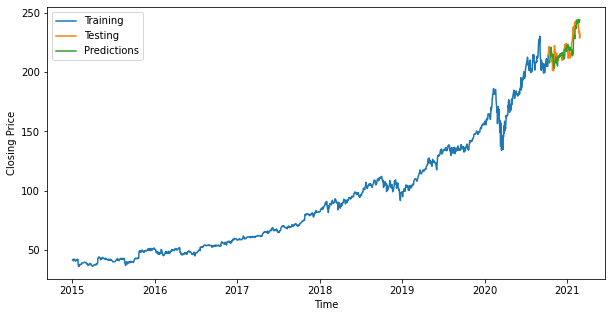

In [141]:
plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_MSFT['Date'][Pre_Processed_MSFT['Date']<'2020-10-12'],
         Pre_Processed_MSFT['Adj. Close'][Pre_Processed_MSFT['Date']<'2020-10-12'],
         label='Training')

plt.plot(Pre_Processed_MSFT['Date'][Pre_Processed_MSFT['Date']>='2020-10-09'],
         Pre_Processed_MSFT['Adj. Close'][Pre_Processed_MSFT['Date']>='2020-10-09'],
         label='Testing')

plt.plot(Pre_Processed_MSFT['Date'][Pre_Processed_MSFT['Date']>='2020-10-12'],
         MSFT_Prediction.reshape(-1),
         label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [142]:
MSFT_rmse=math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1,5),MSFT_Prediction))
MSFT_mape=np.mean(np.abs(MSFT_Prediction-MSFT_Test_Y.reshape(-1,5))/np.abs(MSFT_Test_Y.reshape(-1,5)))

print(f'RMSE: {GOOG_rmse}')
print(f'RMSE: {GOOG_mape}')

RMSE: 73.64016294634419
RMSE: 0.03126145535555081


In [143]:
TSLA_Prediction=TSLA_Model.predict(TSLA_Test_X)

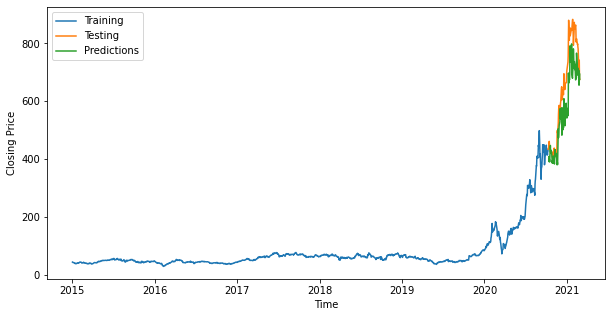

In [144]:
plt.figure(figsize=(10,5))
plt.plot(Pre_Processed_TSLA['Date'][Pre_Processed_TSLA['Date']<'2020-10-12'],
         Pre_Processed_TSLA['Adj. Close'][Pre_Processed_TSLA['Date']<'2020-10-12'],
         label='Training')

plt.plot(Pre_Processed_TSLA['Date'][Pre_Processed_TSLA['Date']>='2020-10-09'],
         Pre_Processed_TSLA['Adj. Close'][Pre_Processed_TSLA['Date']>='2020-10-09'],
         label='Testing')

plt.plot(Pre_Processed_TSLA['Date'][Pre_Processed_TSLA['Date']>='2020-10-12'],
         TSLA_Prediction.reshape(-1),
         label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [145]:
TSLA_rmse=math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1,5),TSLA_Prediction))
TSLA_mape=np.mean(np.abs(TSLA_Prediction-TSLA_Test_Y.reshape(-1,5))/np.abs(TSLA_Test_Y.reshape(-1,5)))

print(f'RMSE: {TSLA_rmse}')
print(f'RMSE: {TSLA_mape}')

RMSE: 91.3167203742753
RMSE: 0.10336477053037592


In [ ]:
# model.save('keras_model.h5')

In [ ]:
AAPL_Model.save('karas_model.h5')